In [174]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series,DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
data=pd.read_csv("C:\\Users\\tarun\\Desktop\\Machine Learning\\ONP\\OnlineNewsPopularity.csv")
data=pd.DataFrame(data)
print(data.head(10))
print("Data Description: ")
print(data.describe())
feature_names=[  ' n_tokens_title', 
       ' n_unique_tokens',  ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', 
      ' kw_avg_min',
       ' kw_max_avg', ' kw_avg_avg', ' is_weekend', ' kw_avg_max', ' kw_min_avg',
       ' LDA_03', ' global_subjectivity',
      
       ' global_rate_negative_words',
       ' rate_negative_words', ' self_reference_avg_sharess',
                 ' self_reference_min_shares',
       ' self_reference_max_shares', 
       
       
       ' title_sentiment_polarity', ' abs_title_subjectivity', ]
print("Columns of the dataset:")
print((data.columns))
print("Size Of the data: "+str(data.size))
print("Shape of the data: "+str(data.shape))
print(pd.DataFrame(data.dtypes[0:15]))

                                                 url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...         731   
1  http://mashable.com/2013/01/07/ap-samsung-spon...         731   
2  http://mashable.com/2013/01/07/apple-40-billio...         731   
3  http://mashable.com/2013/01/07/astronaut-notre...         731   
4   http://mashable.com/2013/01/07/att-u-verse-apps/         731   
5   http://mashable.com/2013/01/07/beewi-smart-toys/         731   
6  http://mashable.com/2013/01/07/bodymedia-armba...         731   
7   http://mashable.com/2013/01/07/canon-poweshot-n/         731   
8  http://mashable.com/2013/01/07/car-of-the-futu...         731   
9  http://mashable.com/2013/01/07/chuck-hagel-web...         731   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0               12                219          0.663594                1.0   
1                9                255          0.604743                1.0   
2                

In [175]:
print("Null values of the dataset")
pd.DataFrame(data.isnull().sum()[:62])


Null values of the dataset


,0
url,0
timedelta,0
n_tokens_title,0
n_tokens_content,0
n_unique_tokens,0
n_non_stop_words,0
n_non_stop_unique_tokens,0
num_hrefs,0
num_self_hrefs,0
num_imgs,0


In [176]:
print("Correlation of all the attributes with the dataset")
pd.DataFrame(data.corr()['shares'].sort_values()[:25:-1])

Correlation of all the attributes with the dataset


,shares
shares,1.000000
kw_avg_avg,0.110410
LDA_03,0.083771
kw_max_avg,0.064305
self_reference_avg_sharess,0.057789
self_reference_min_shares,0.055957
self_reference_max_shares,0.047115
num_hrefs,0.045405
kw_avg_max,0.044684
kw_min_avg,0.039550


In [177]:
x=data.shares
def func(x):
    if 0 < x <= 1200:
        return 'low_popularity'
    elif 1200 < x <= 2100:
        return 'medium_popularity'
    return 'high_popularity'

data['popularity_level'] = data['shares'].apply(func)
print(pd.DataFrame(data.popularity_level).head(10))

    popularity_level
0     low_popularity
1     low_popularity
2  medium_popularity
3     low_popularity
4     low_popularity
5     low_popularity
6     low_popularity
7  medium_popularity
8    high_popularity
9     low_popularity


In [178]:
y=data.shares
def func(y):
    if 0 < y <= 1400:
        return 'non_popular'
    return 'popular'

data['popularity_of_shares'] = pd.DataFrame(data['shares'].apply(func))
print(pd.DataFrame(data.popularity_of_shares).head(10))

  popularity_of_shares
0          non_popular
1          non_popular
2              popular
3          non_popular
4          non_popular
5          non_popular
6          non_popular
7              popular
8              popular
9          non_popular


In [179]:
print("""ATTRIBUTES FOR PREDICTION ARE 
num_hrefs
num_imgs
num_videos
average_token_length
data_channel_is_lifestyle
abs_title_subjectivity
n_unique_tokens
n_non_stop_unique_tokens
n_tokens_title
n_tokens_content
title_sentiment_polarity
num_self_hrefs
rate_negative_words
global_rate_negative_words
global_subjectivity
global_sentiment_polarity
is_weekend
and target is shares
   """)

ATTRIBUTES FOR PREDICTION ARE 
num_hrefs
num_imgs
num_videos
average_token_length
data_channel_is_lifestyle
abs_title_subjectivity
n_unique_tokens
n_non_stop_unique_tokens
n_tokens_title
n_tokens_content
title_sentiment_polarity
num_self_hrefs
rate_negative_words
global_rate_negative_words
global_subjectivity
global_sentiment_polarity
is_weekend
and target is shares
   


In [180]:
d=pd.DataFrame(data)
a= d.drop(['url',' timedelta', 
        ' num_keywords',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', 
       ' kw_min_max', ' kw_max_max', ' n_tokens_content',' data_channel_is_lifestyle',
         
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' LDA_00', ' LDA_01', ' LDA_02',
        ' LDA_04',
        ' global_rate_positive_words', ' global_sentiment_polarity', 
        ' rate_positive_words',
       ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' abs_title_sentiment_polarity','popularity_of_shares',' rate_negative_words','popularity_level'], axis=1)
d = d.drop(['url',' timedelta', 
        ' num_keywords', ' n_tokens_content',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',' data_channel_is_lifestyle',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', 
       ' kw_min_max', ' kw_max_max',  ' global_sentiment_polarity', 
       
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_04',
        ' global_rate_positive_words',
        ' rate_positive_words',
       ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' abs_title_sentiment_polarity',' n_non_stop_words'], axis=1)
print(pd.DataFrame(d).head(25))
pd.DataFrame(d.corr()['shares'].sort_values()[::-1])
print(d.shape)

     n_tokens_title   n_unique_tokens   n_non_stop_unique_tokens   num_hrefs  \
0                12          0.663594                   0.815385           4   
1                 9          0.604743                   0.791946           3   
2                 9          0.575130                   0.663866           3   
3                 9          0.503788                   0.665635           9   
4                13          0.415646                   0.540890          19   
5                10          0.559889                   0.698198           2   
6                 8          0.418163                   0.549834          21   
7                12          0.433574                   0.572108          20   
8                11          0.670103                   0.836735           2   
9                10          0.636364                   0.797101           4   
10                9          0.490050                   0.731638          11   
11               10          0.666667   

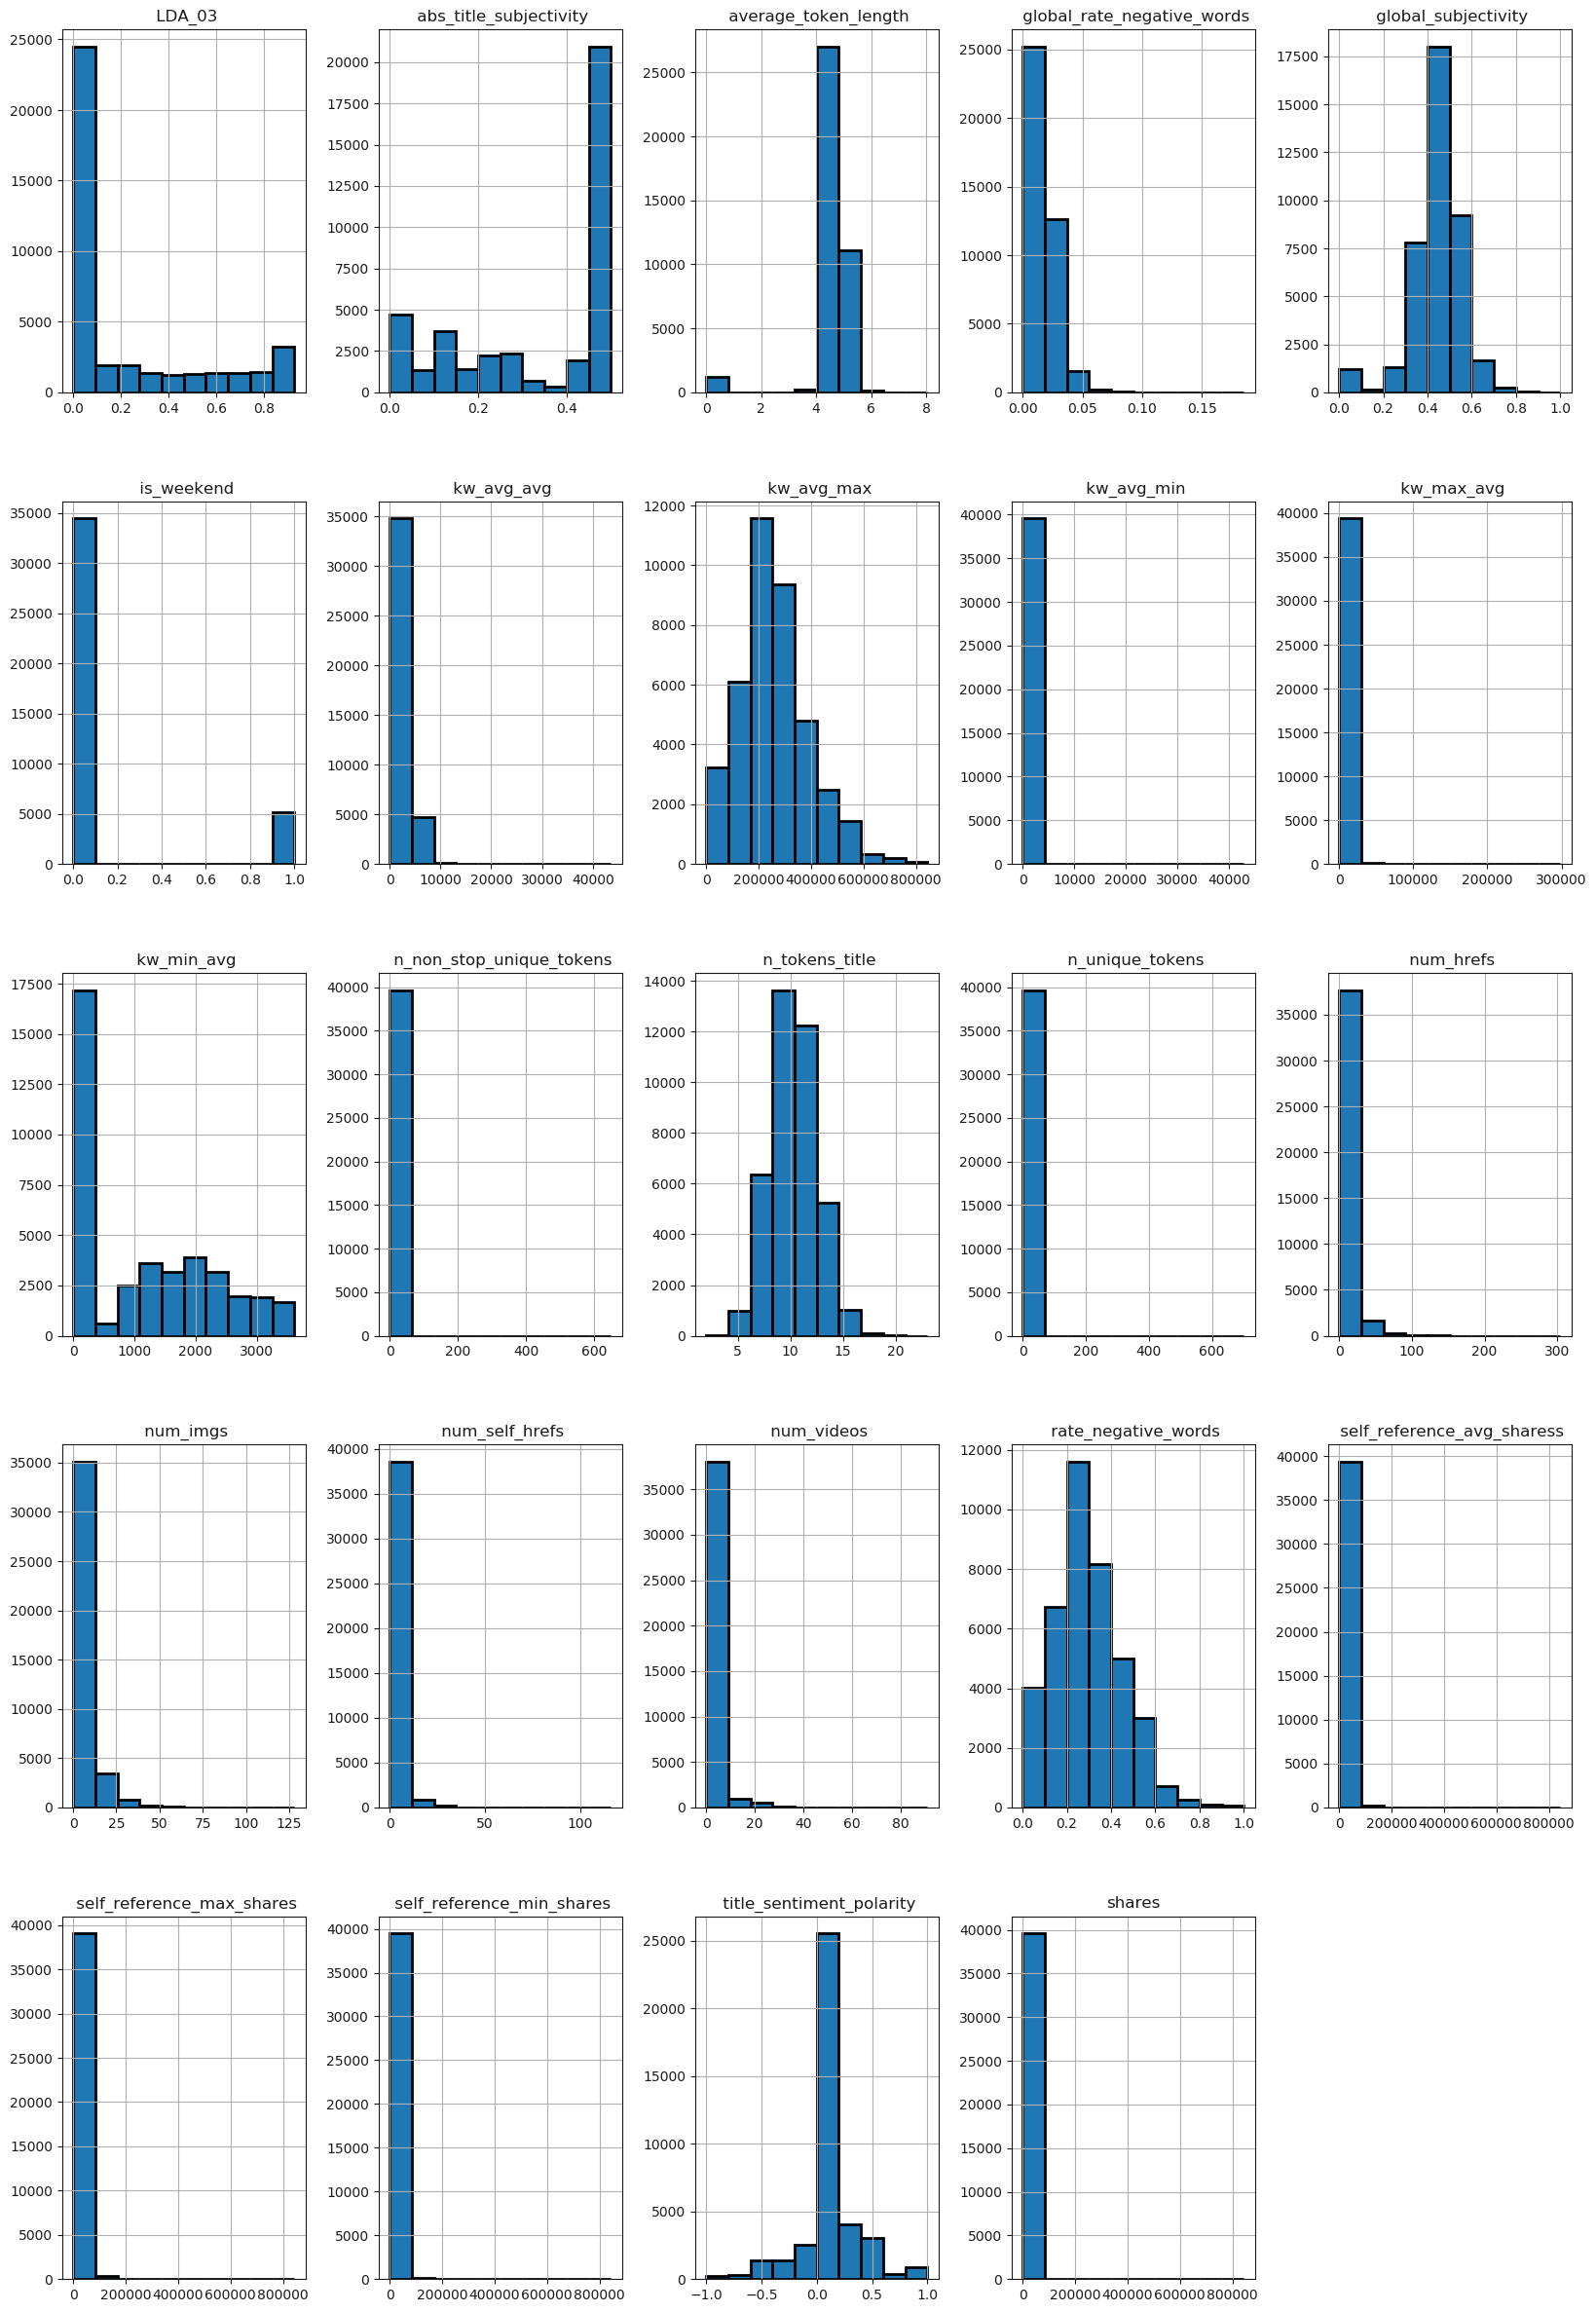

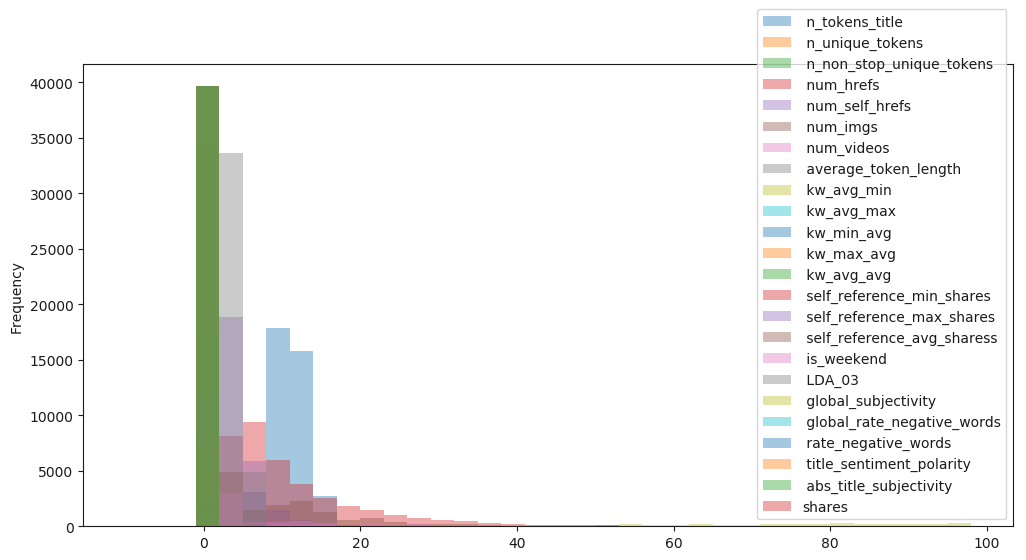

In [181]:
from numpy import*
d.hist(edgecolor='black',linewidth=2.0,figsize=(20,30))
a=arange(-10,100,3)
d.plot(kind='hist',bins=a, figsize=[12,6], alpha=.4, legend=True)

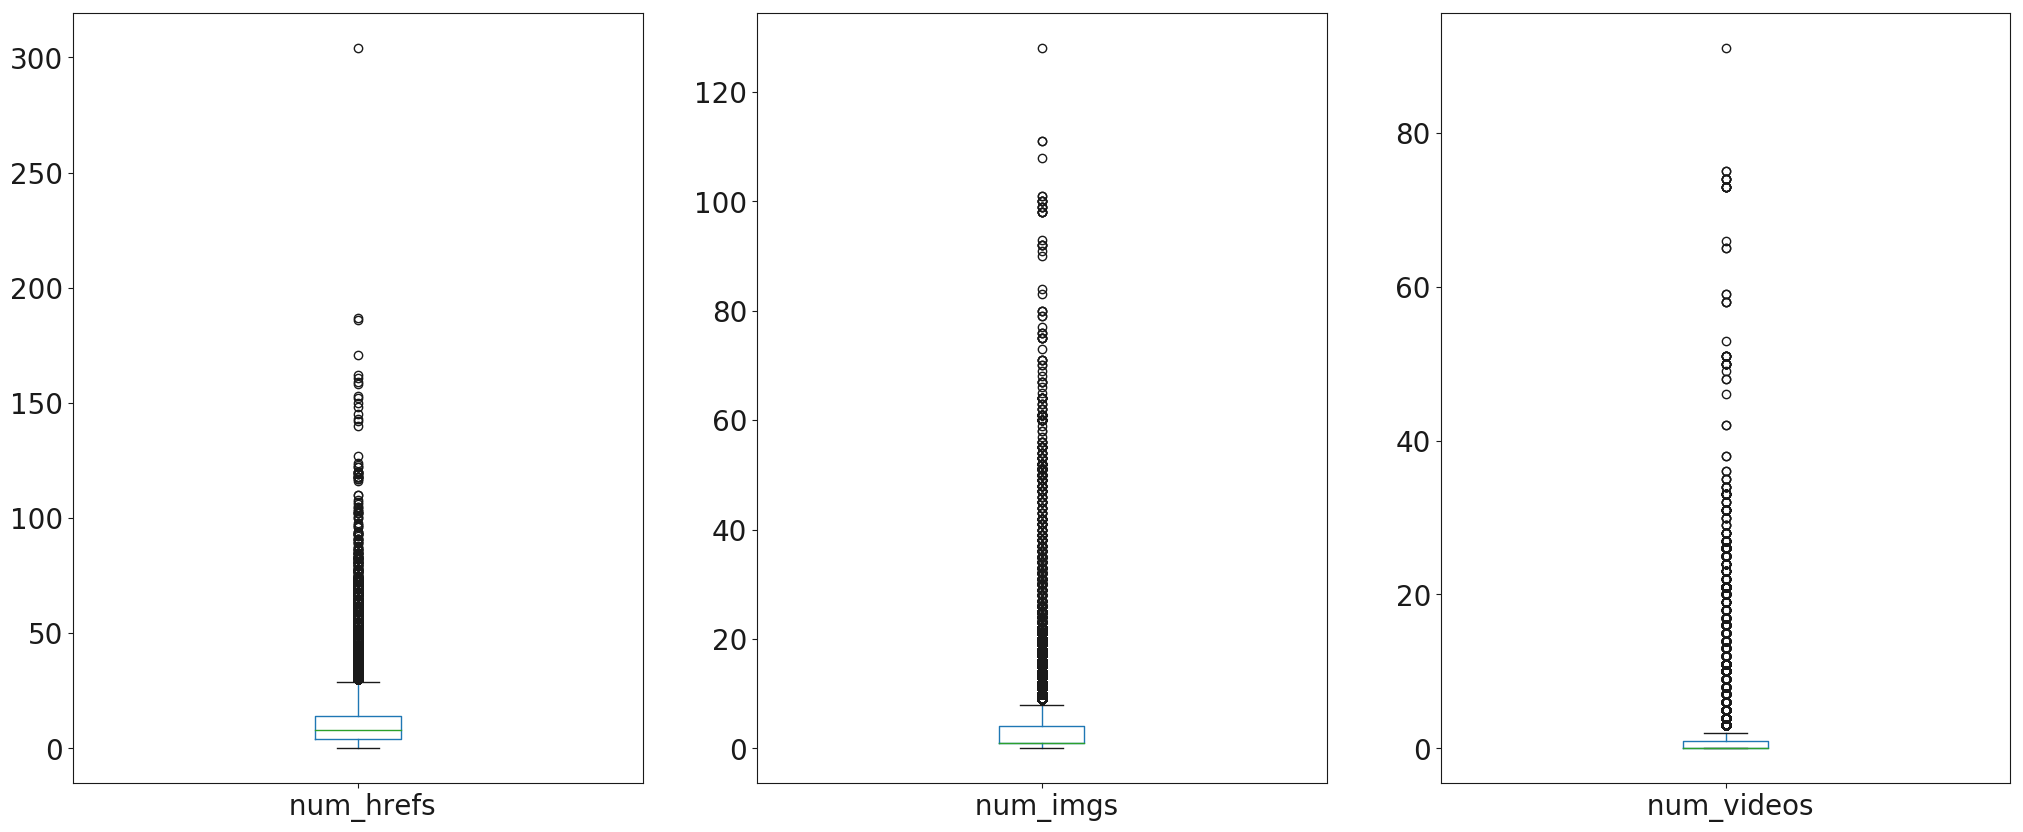

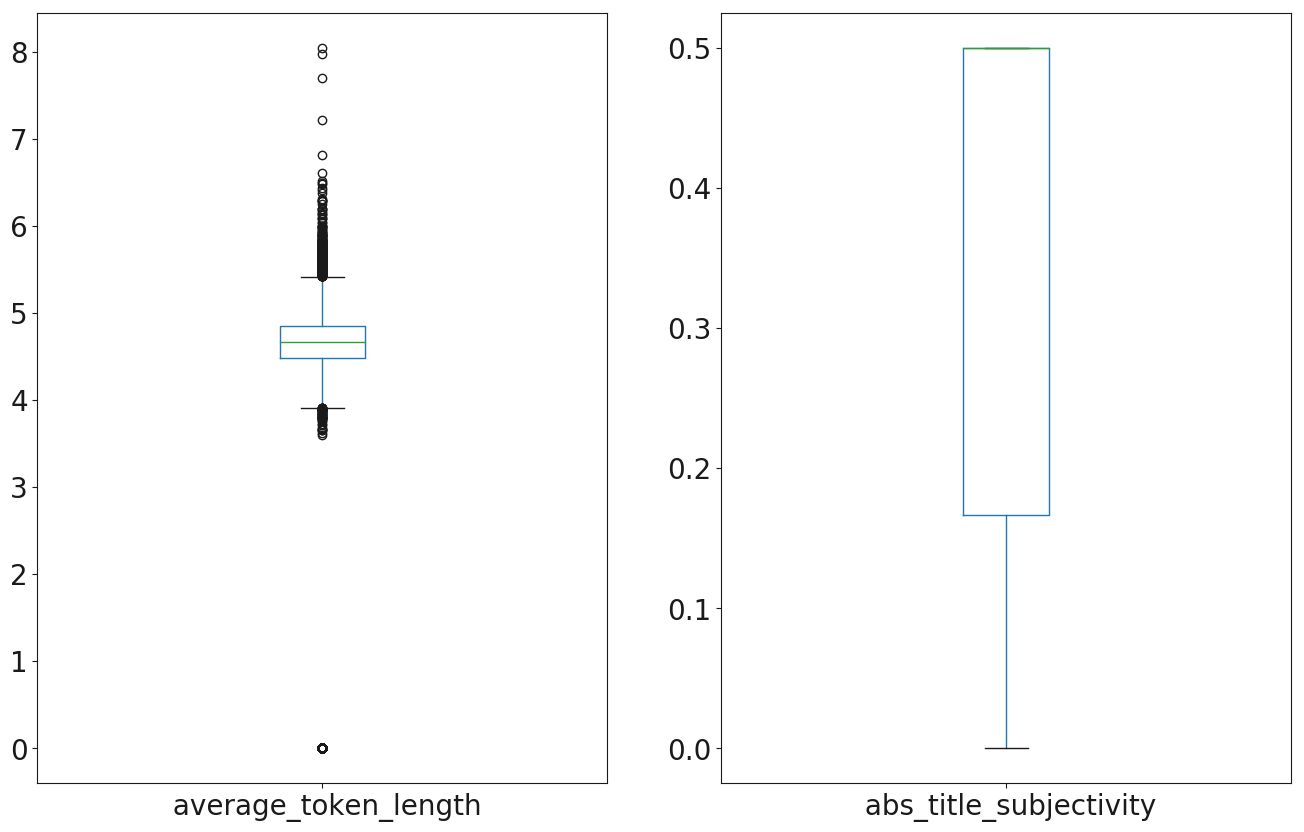

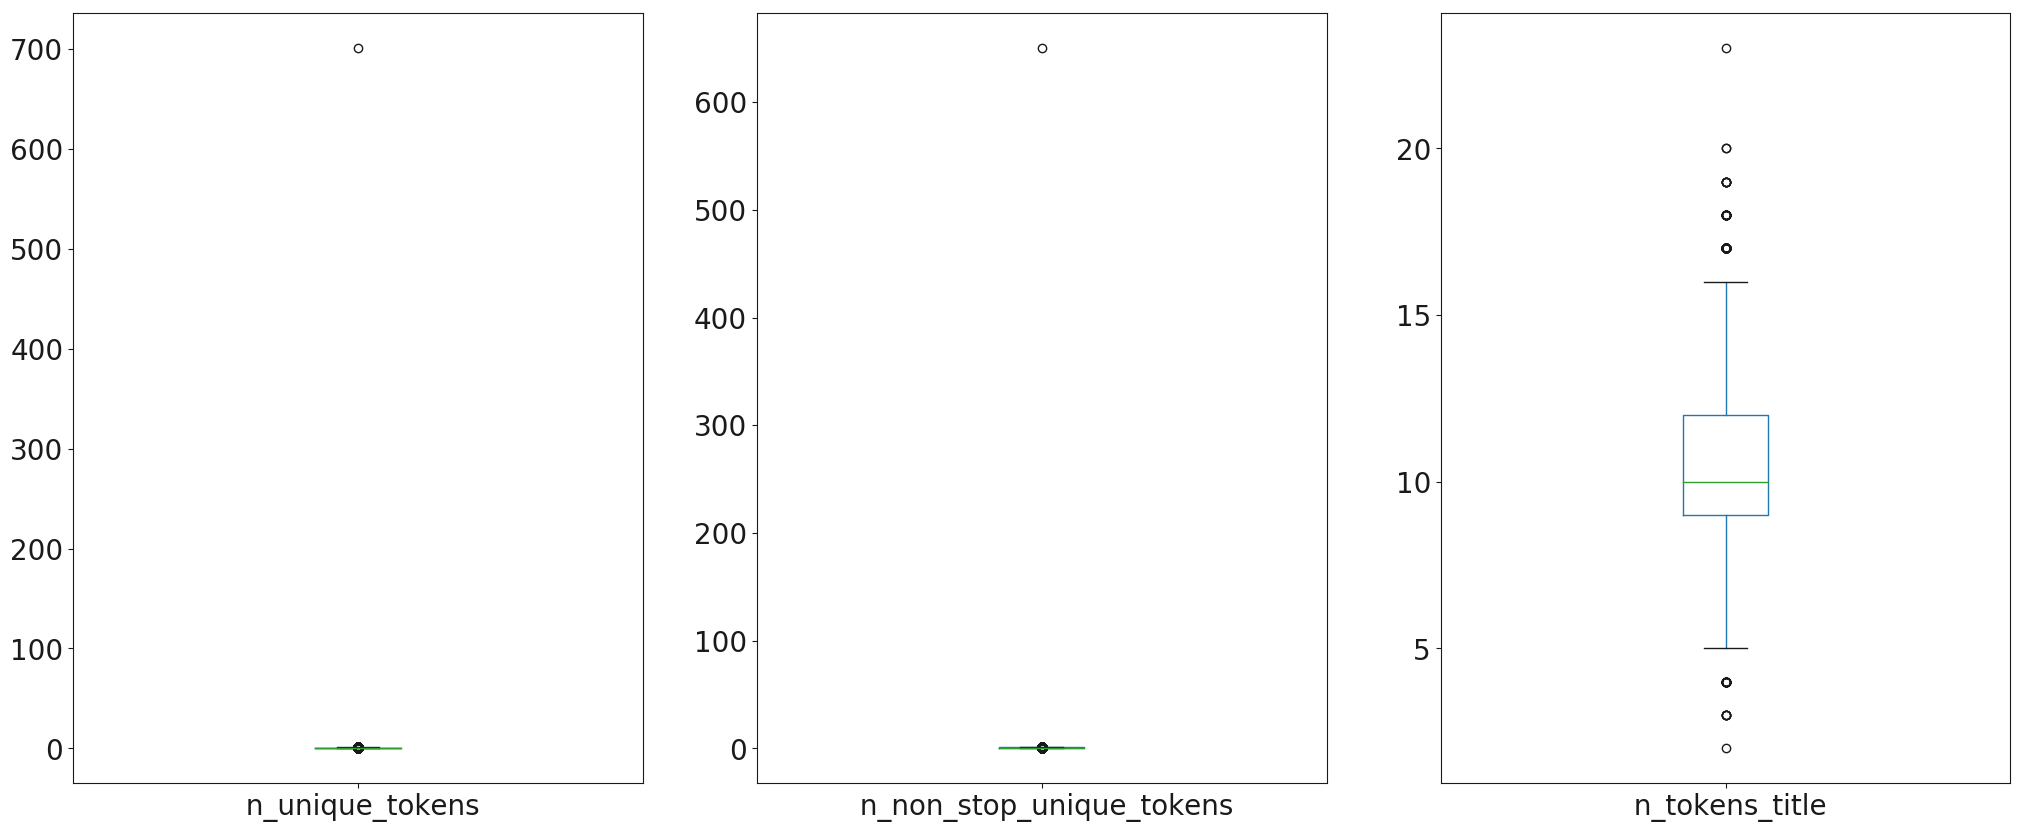

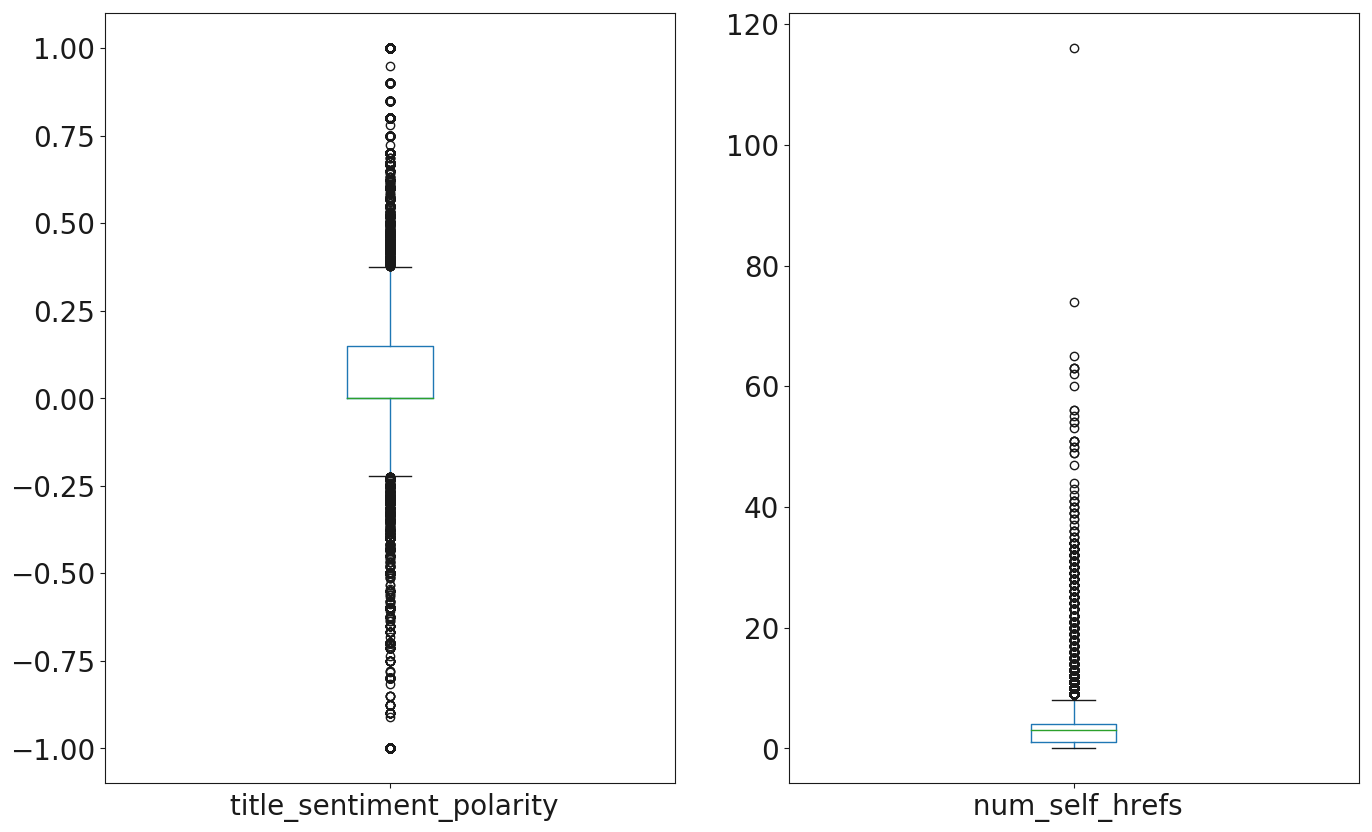

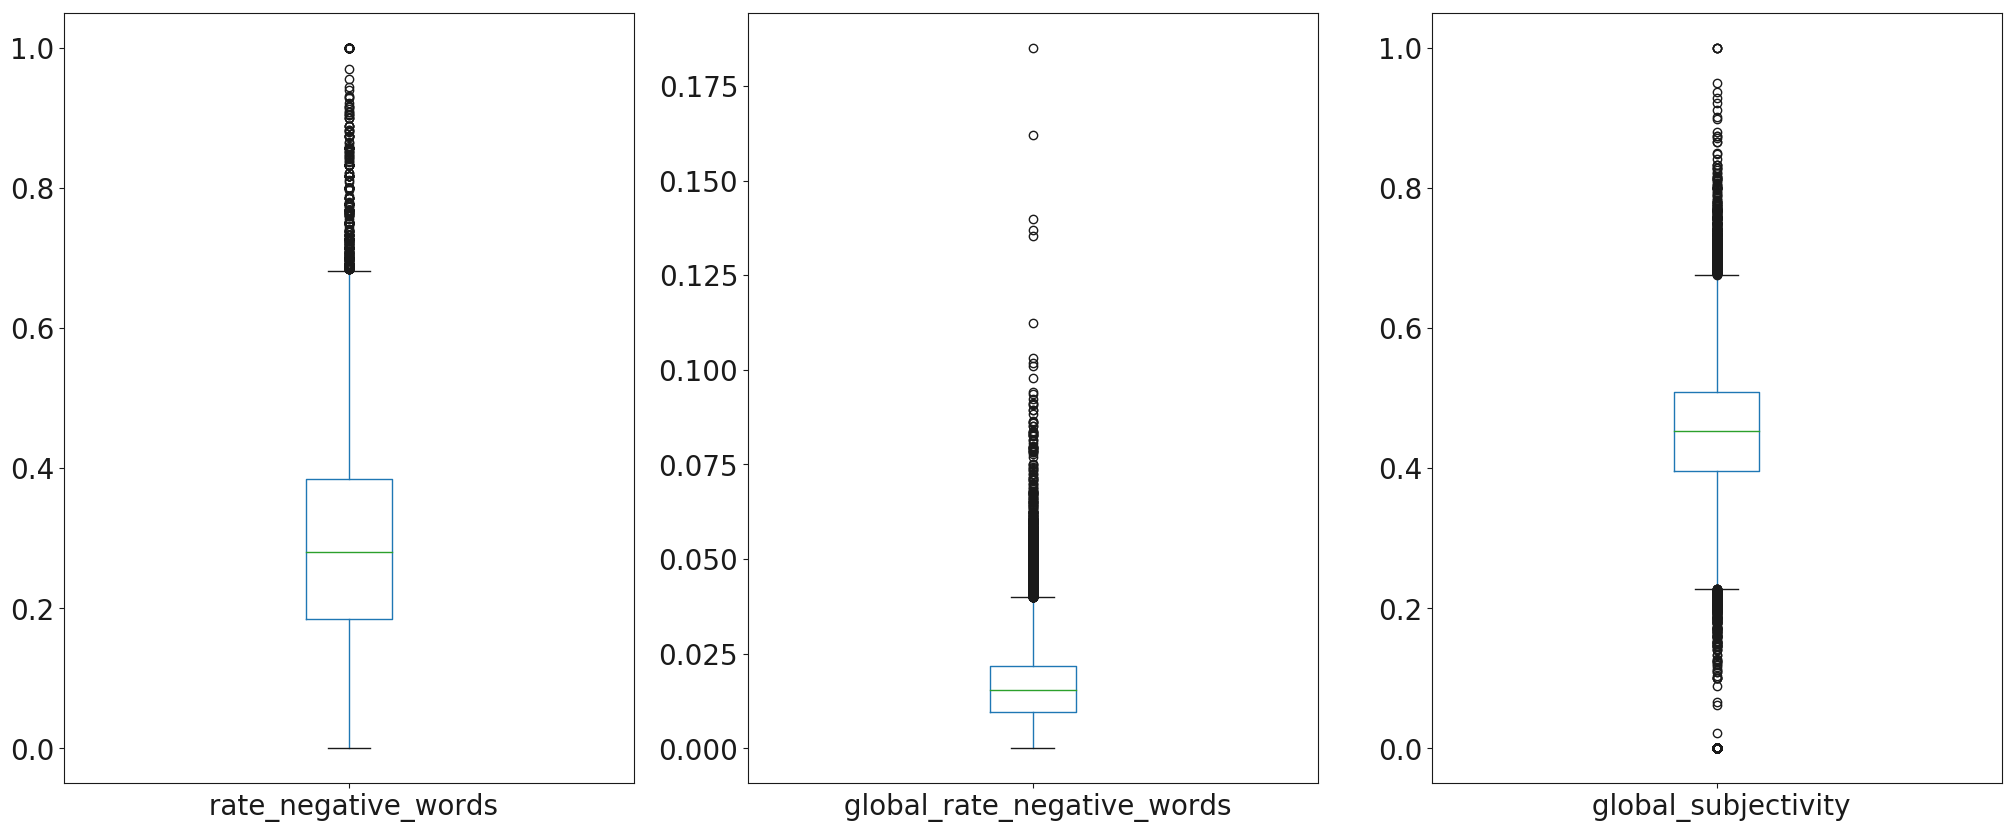

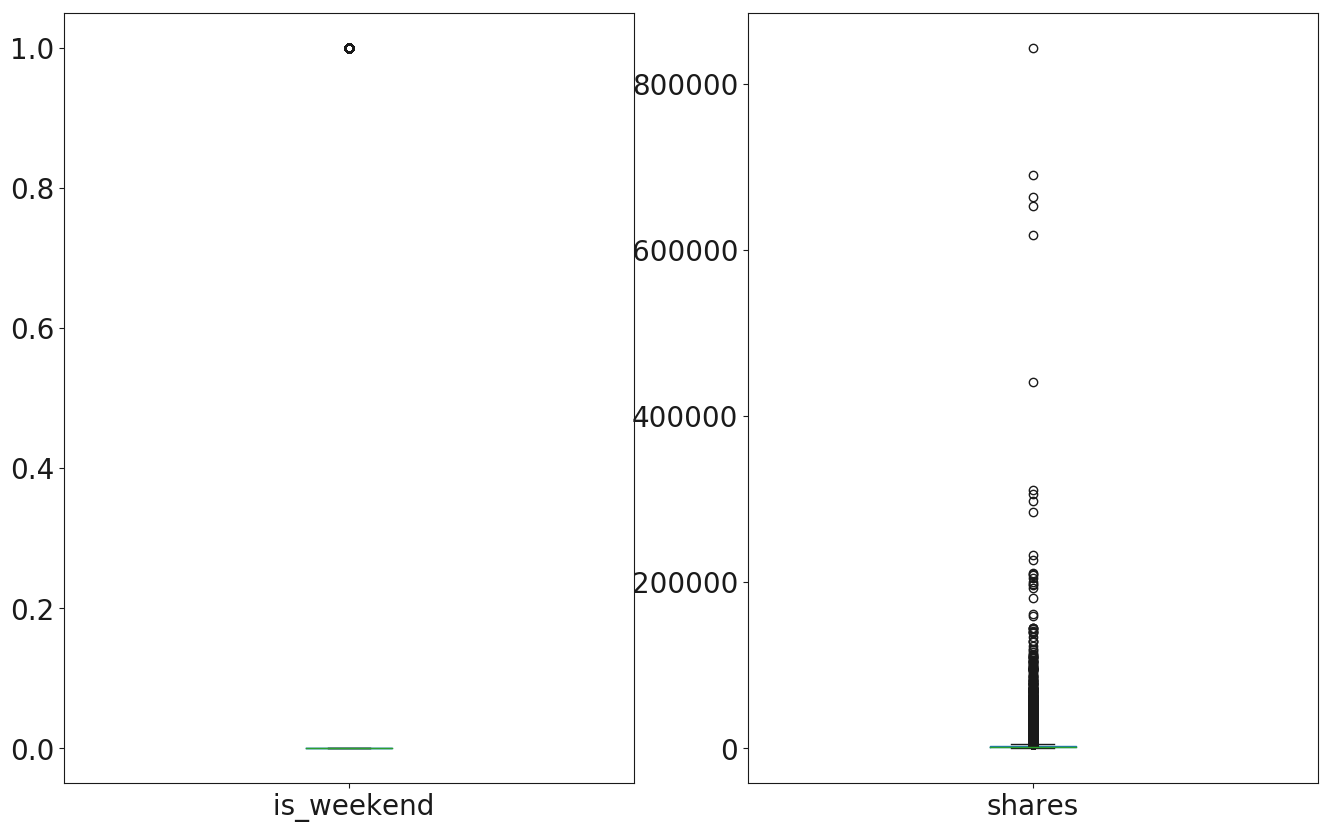

In [182]:
from matplotlib.pyplot import*
subplot(131)
d[" num_hrefs"].plot(kind="box",fontsize=20)
subplot(132)
d[" num_imgs"].plot(kind="box",fontsize=20)
subplot(133)
d[" num_videos"].plot(kind="box",figsize=(25,10),fontsize=20)
show()
subplot(131)
d[" average_token_length"].plot(kind="box",fontsize=20)
subplot(132)
#d[" data_channel_is_lifestyle"].plot(kind="box",fontsize=20)
#subplot(133)
d[" abs_title_subjectivity"].plot(kind="box",figsize=(25,10),fontsize=20)
show()
subplot(131)
d[" n_unique_tokens"].plot(kind="box",fontsize=20)
subplot(132)
d[" n_non_stop_unique_tokens"].plot(kind="box",fontsize=20)
subplot(133)
d[" n_tokens_title"].plot(kind="box",figsize=(25,10),fontsize=20)
show()
subplot(131)
#d[" n_tokens_content"].plot(kind="box",fontsize=20)
#subplot(132)
d[" title_sentiment_polarity"].plot(kind="box",fontsize=20)
subplot(132)
d[" num_self_hrefs"].plot(kind="box",figsize=(25,10),fontsize=20)
show()
subplot(131)
d[" rate_negative_words"].plot(kind="box",fontsize=20)
subplot(132)
d[" global_rate_negative_words"].plot(kind="box",fontsize=20)
subplot(133)
d[" global_subjectivity"].plot(kind="box",figsize=(25,10),fontsize=20)
show()
subplot(131)
#d[" global_sentiment_polarity"].plot(kind="box",fontsize=20)
#subplot(132)
d[" is_weekend"].plot(kind="box",fontsize=20)
subplot(132)
d["shares"].plot(kind="box",figsize=(25,10),fontsize=20)
show()

In [183]:
from pandas import*
from matplotlib.pyplot import*
d=d[(d.shares<d.shares.quantile(0.7))&(d.shares>d.shares.quantile(0.2))]

print(d.shape)

(19391, 26)


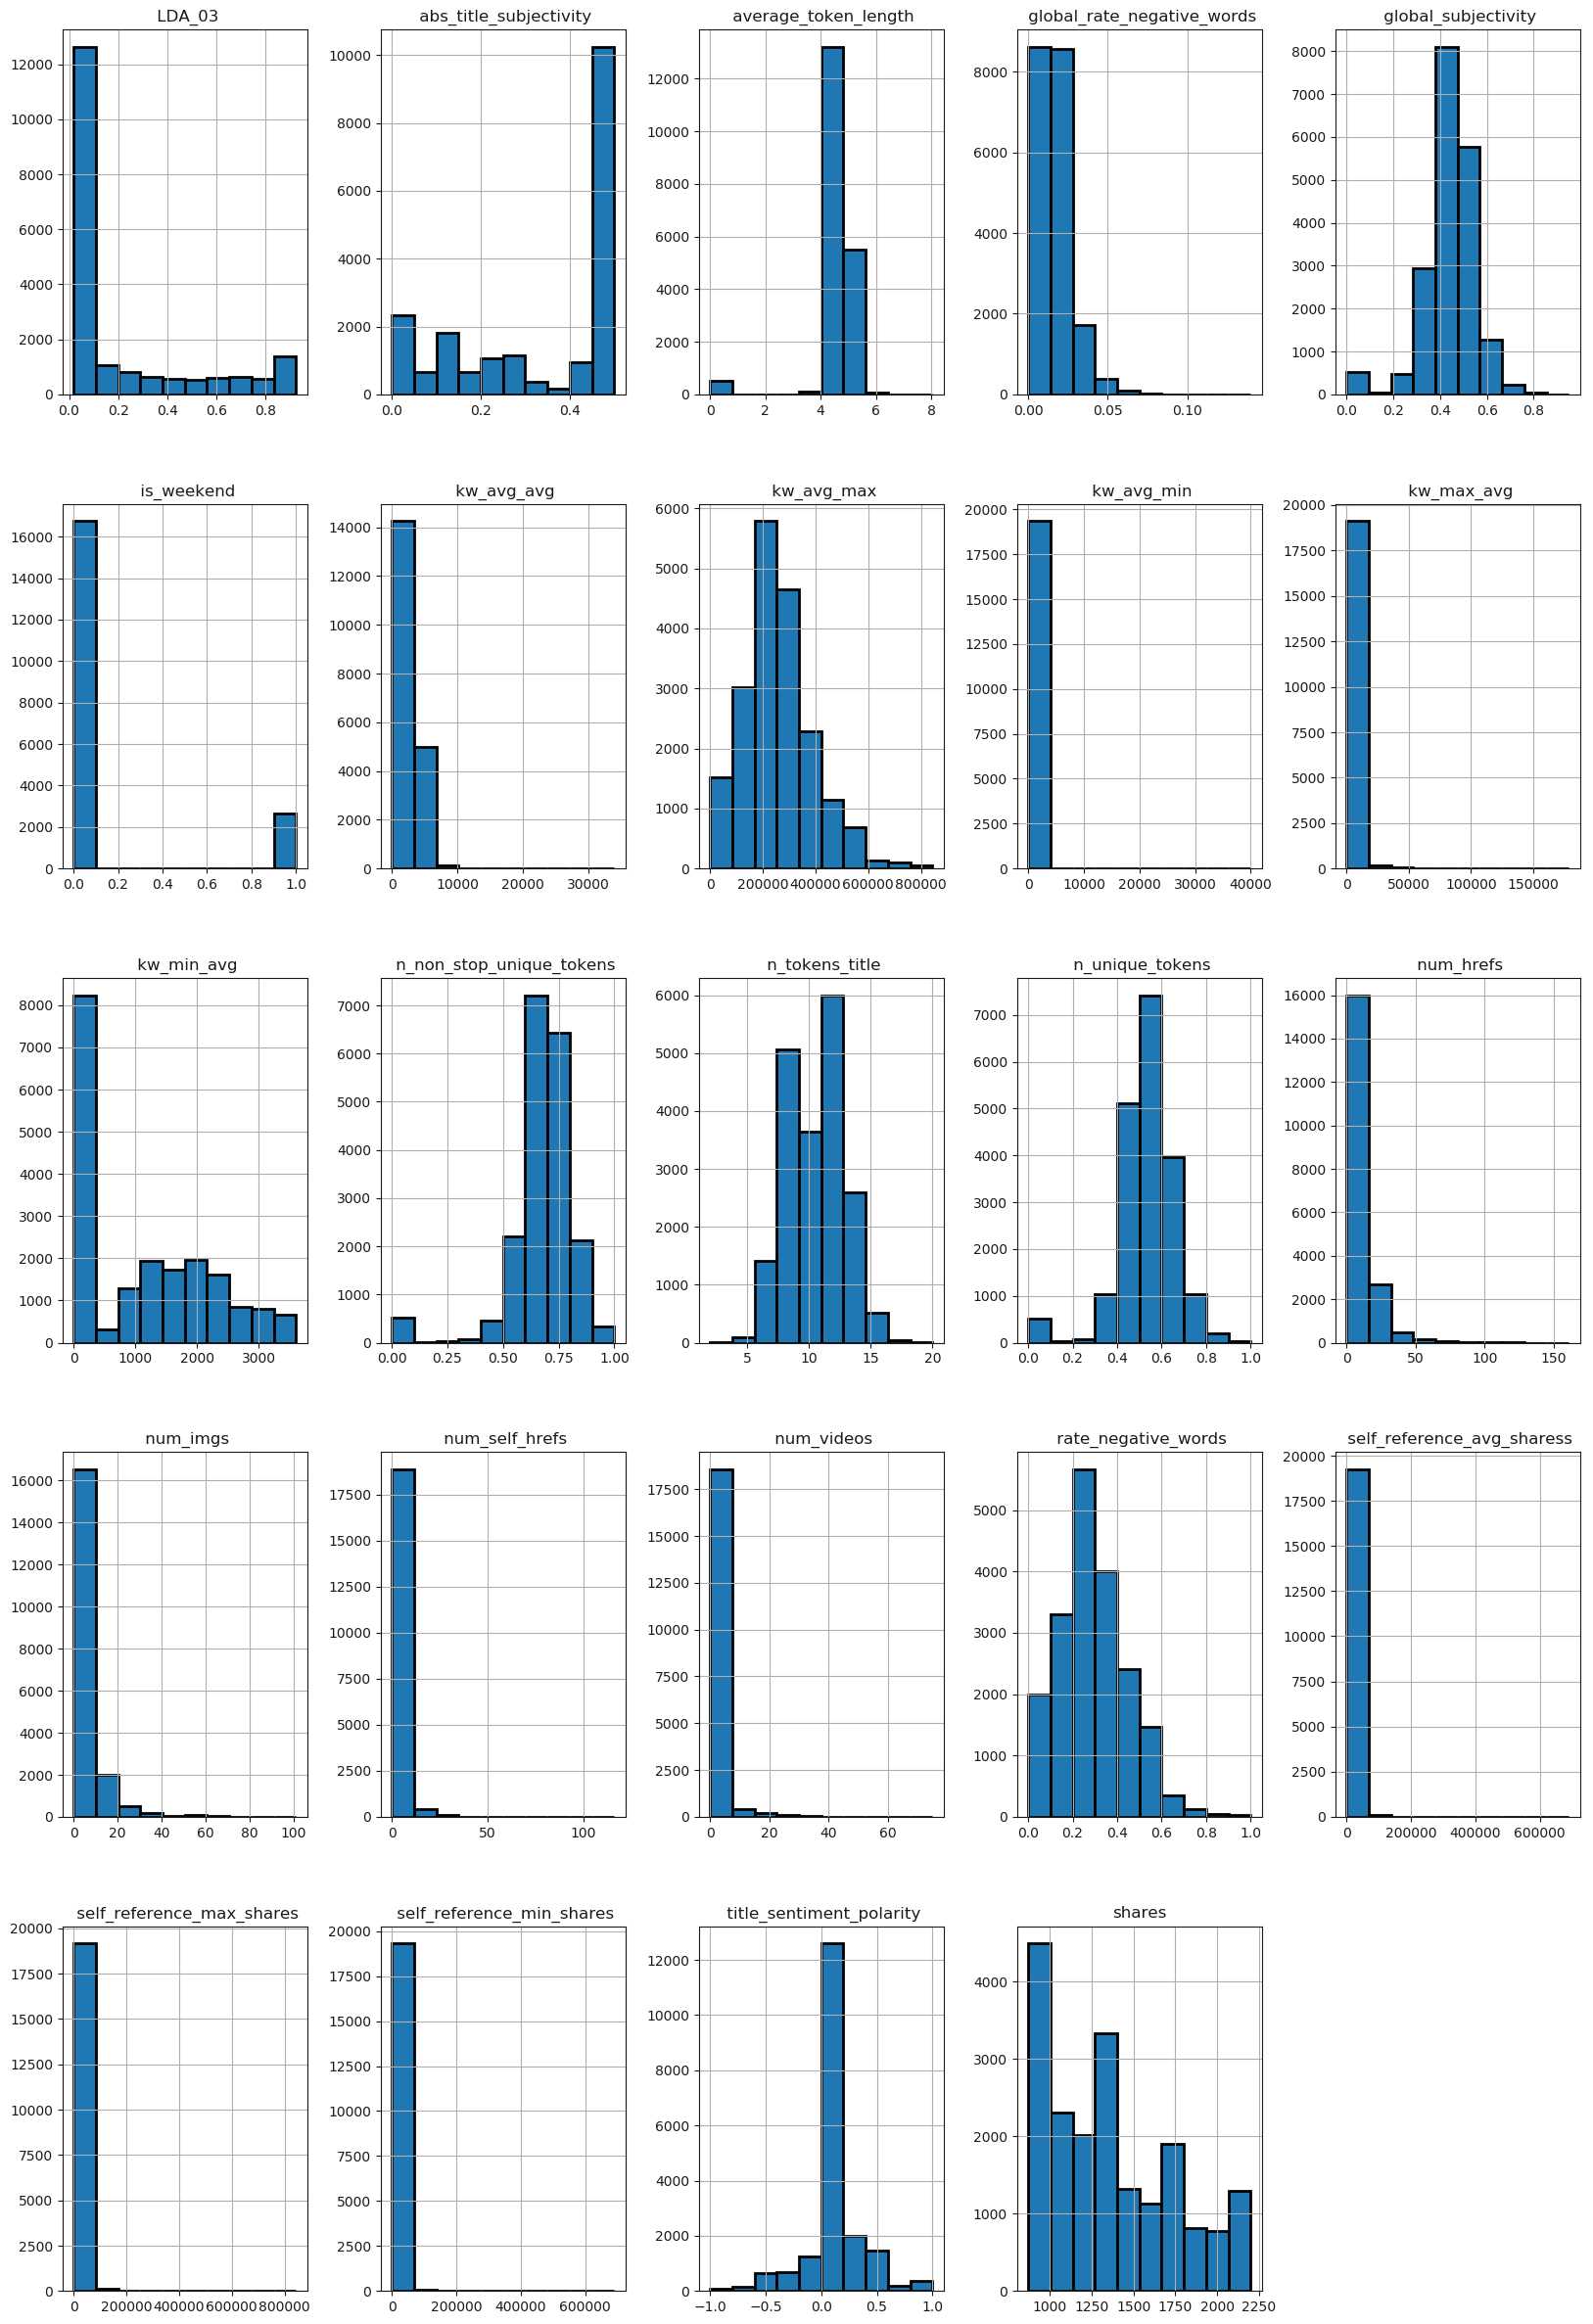

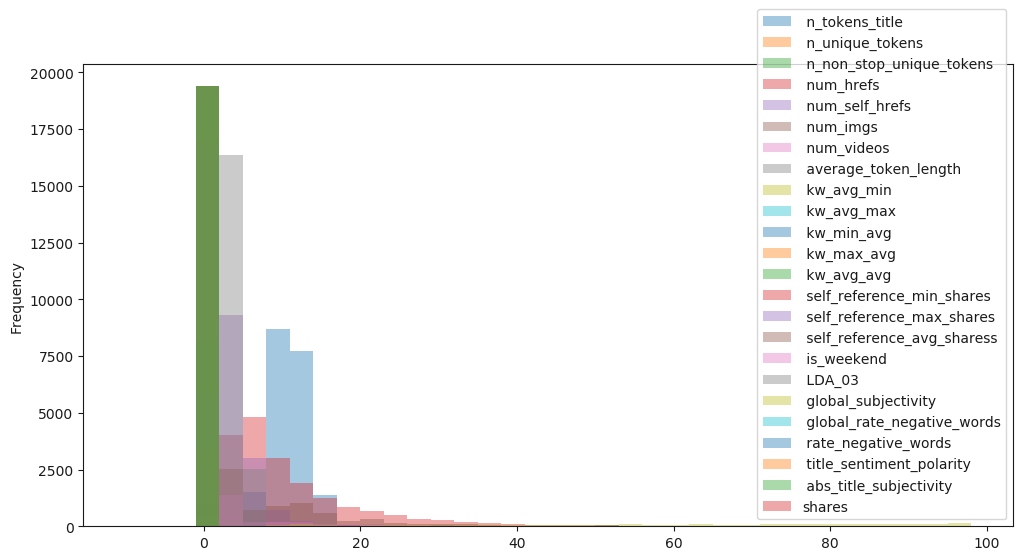

In [184]:
from numpy import*
d.hist(edgecolor='black',linewidth=2.0,figsize=(20,30))
a=arange(-10,100,3)
d.plot(kind='hist',bins=a, figsize=[12,6], alpha=.4, legend=True)

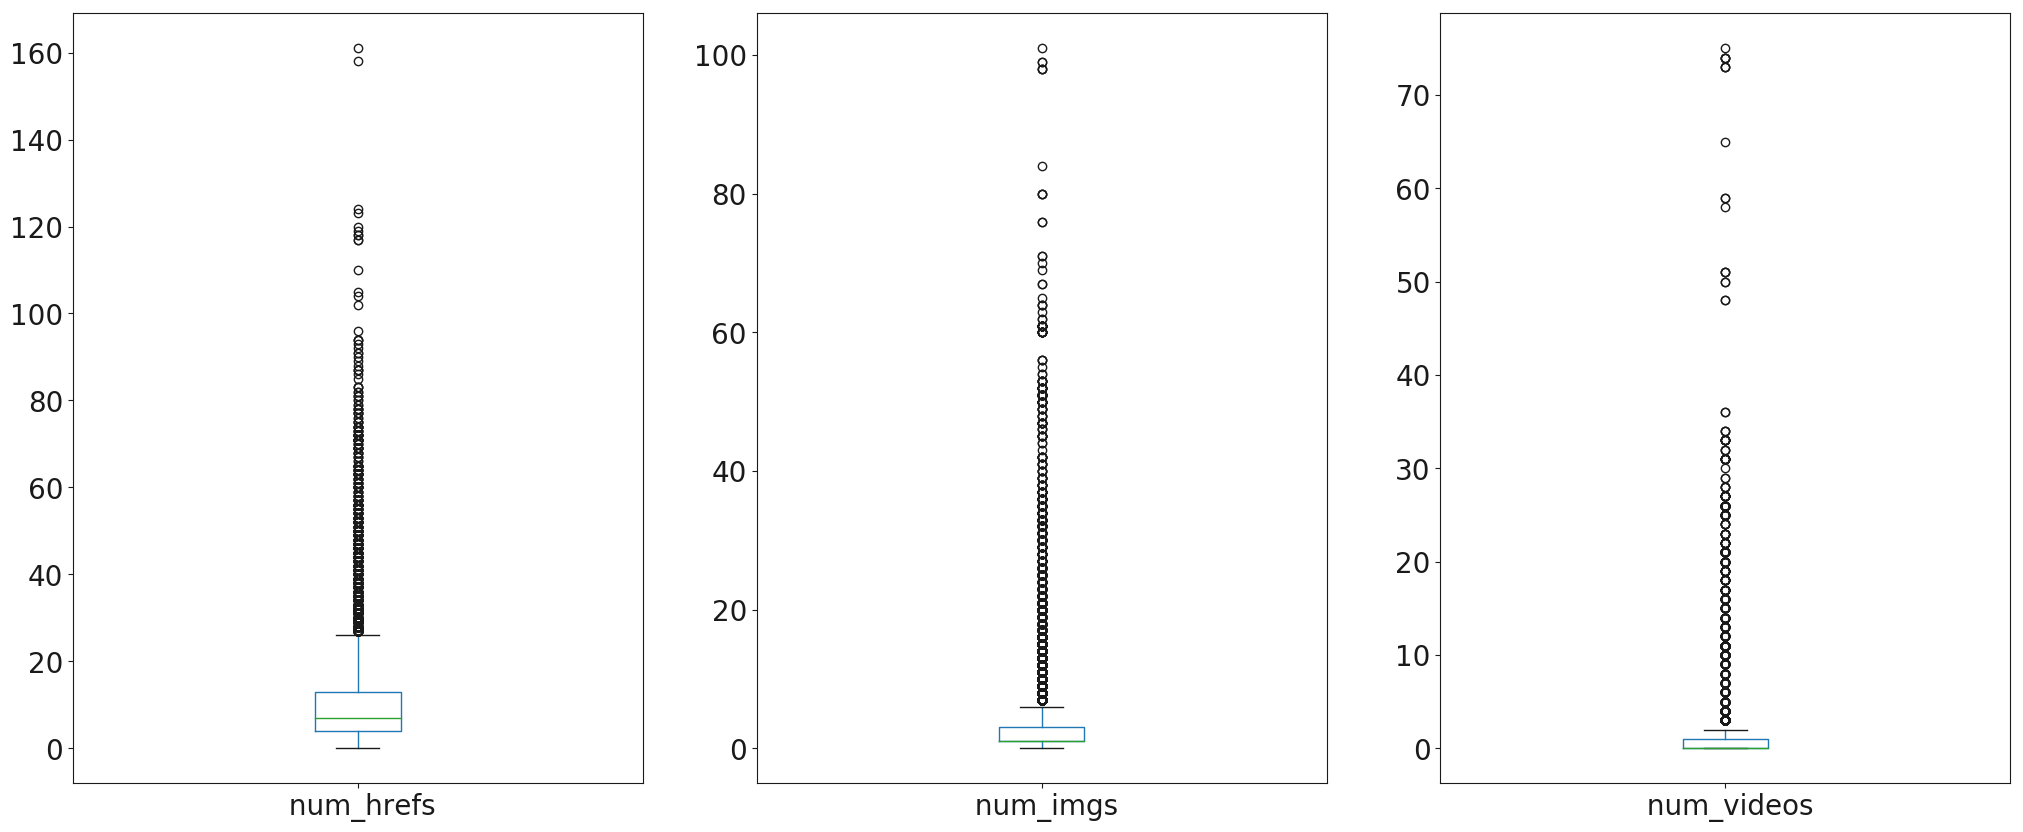

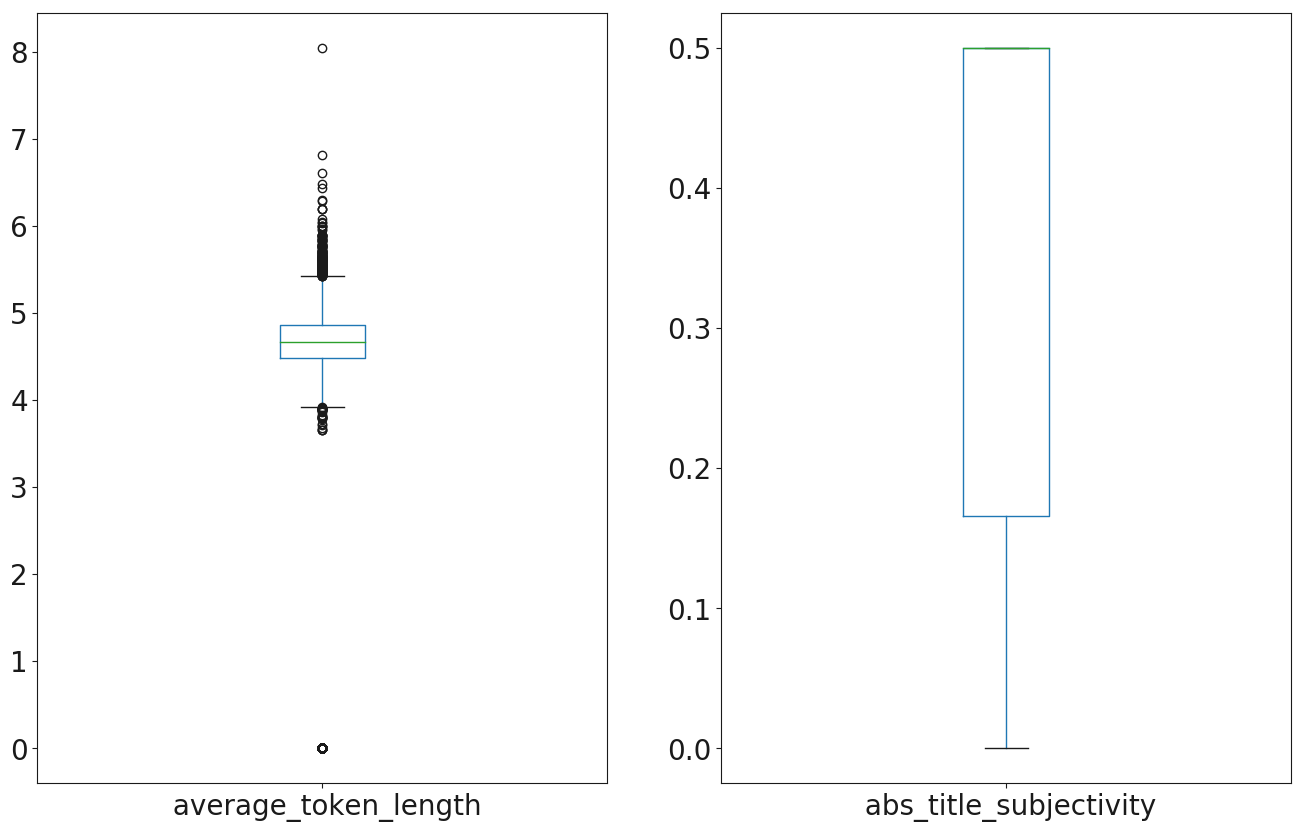

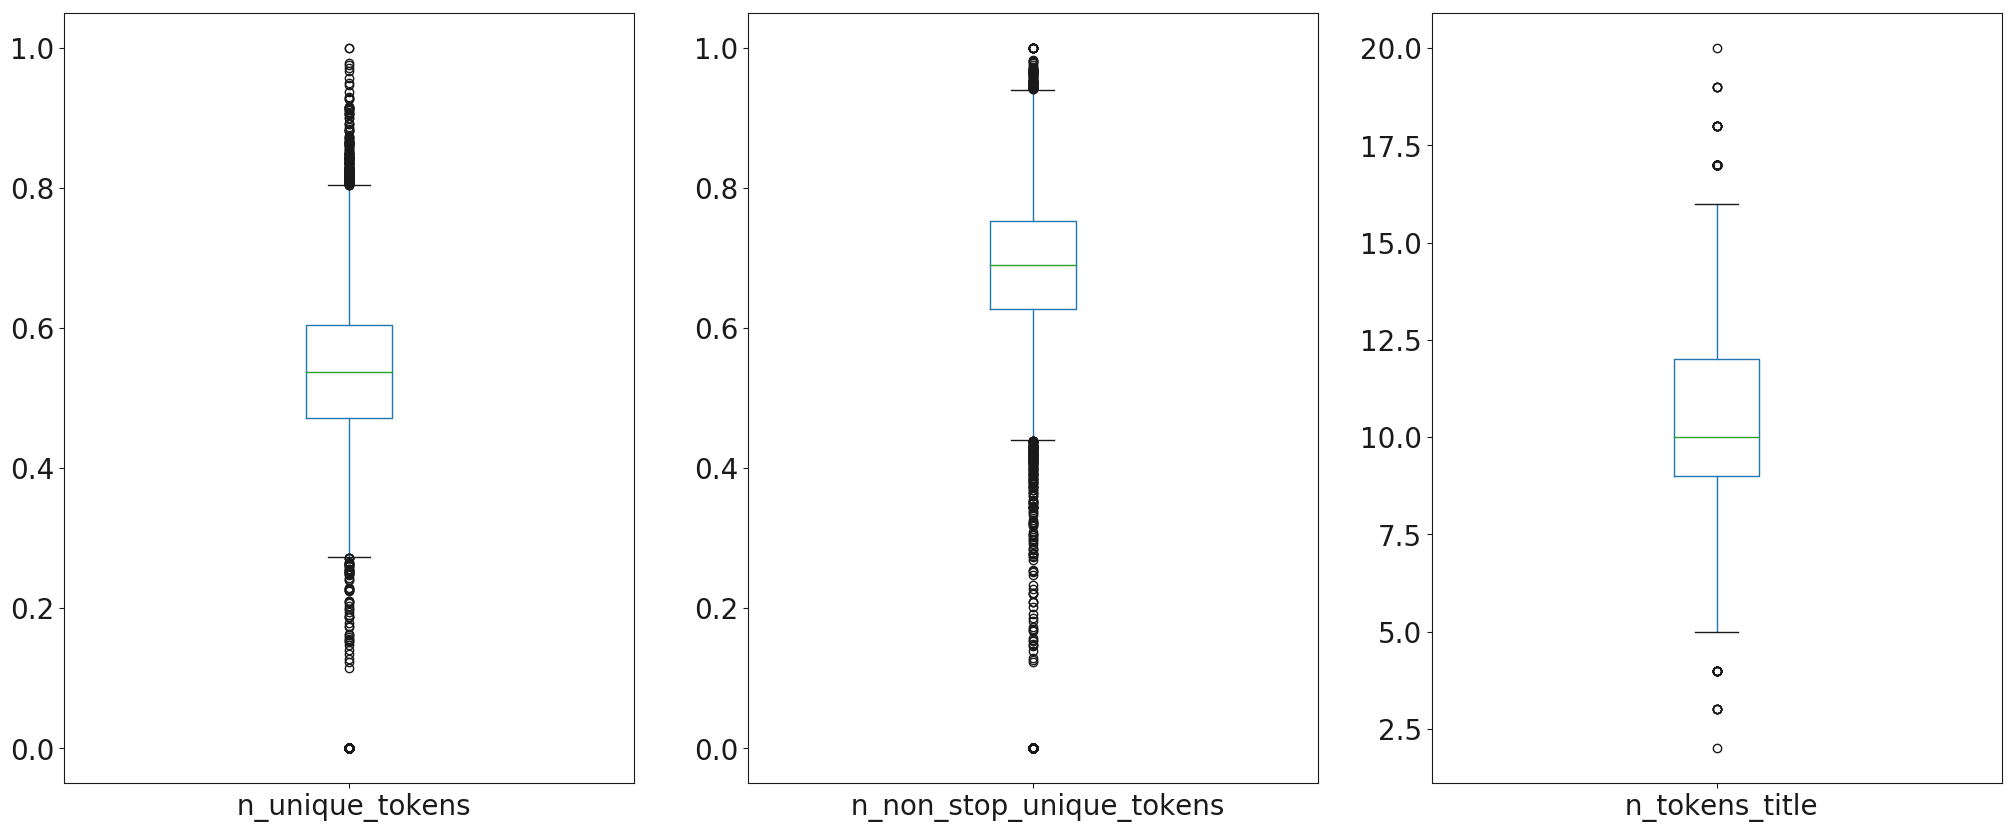

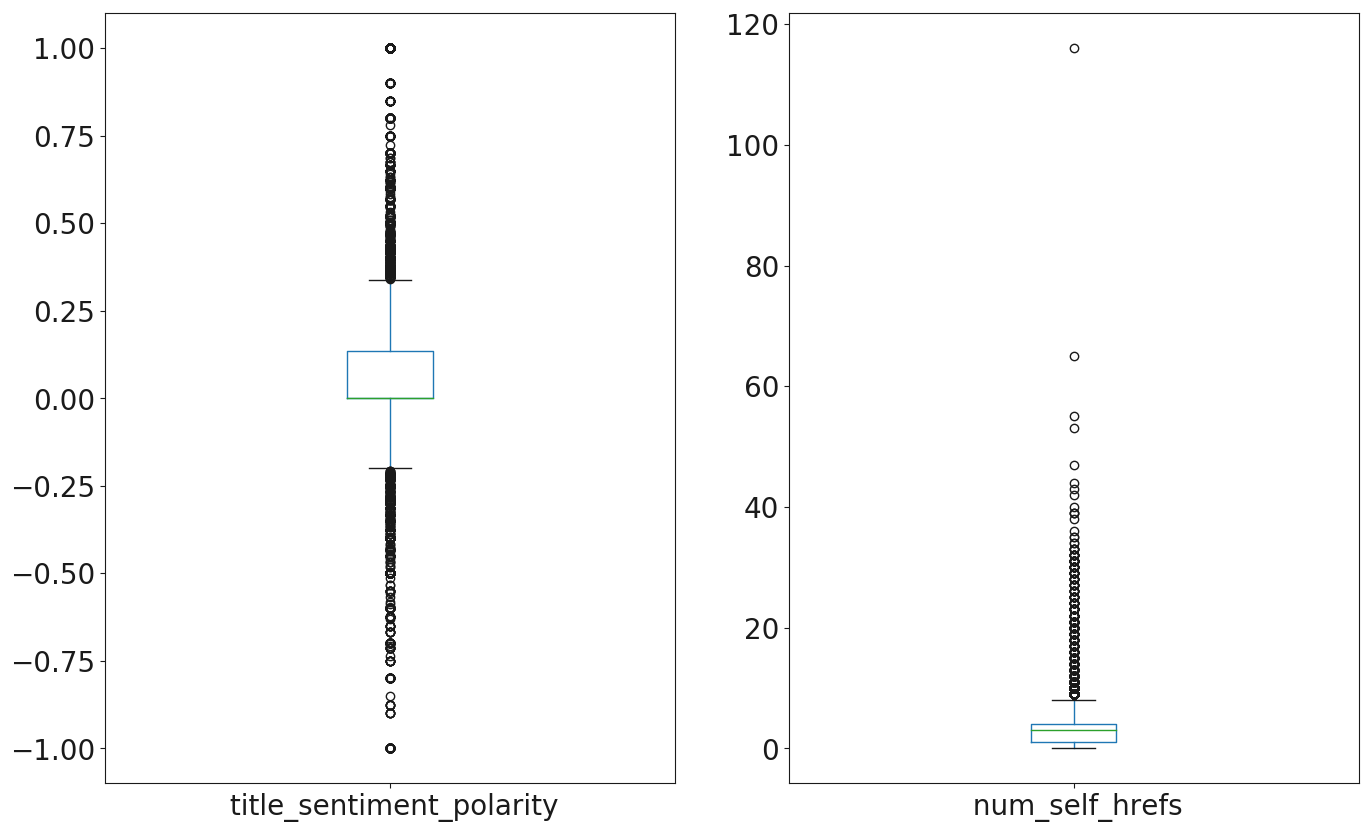

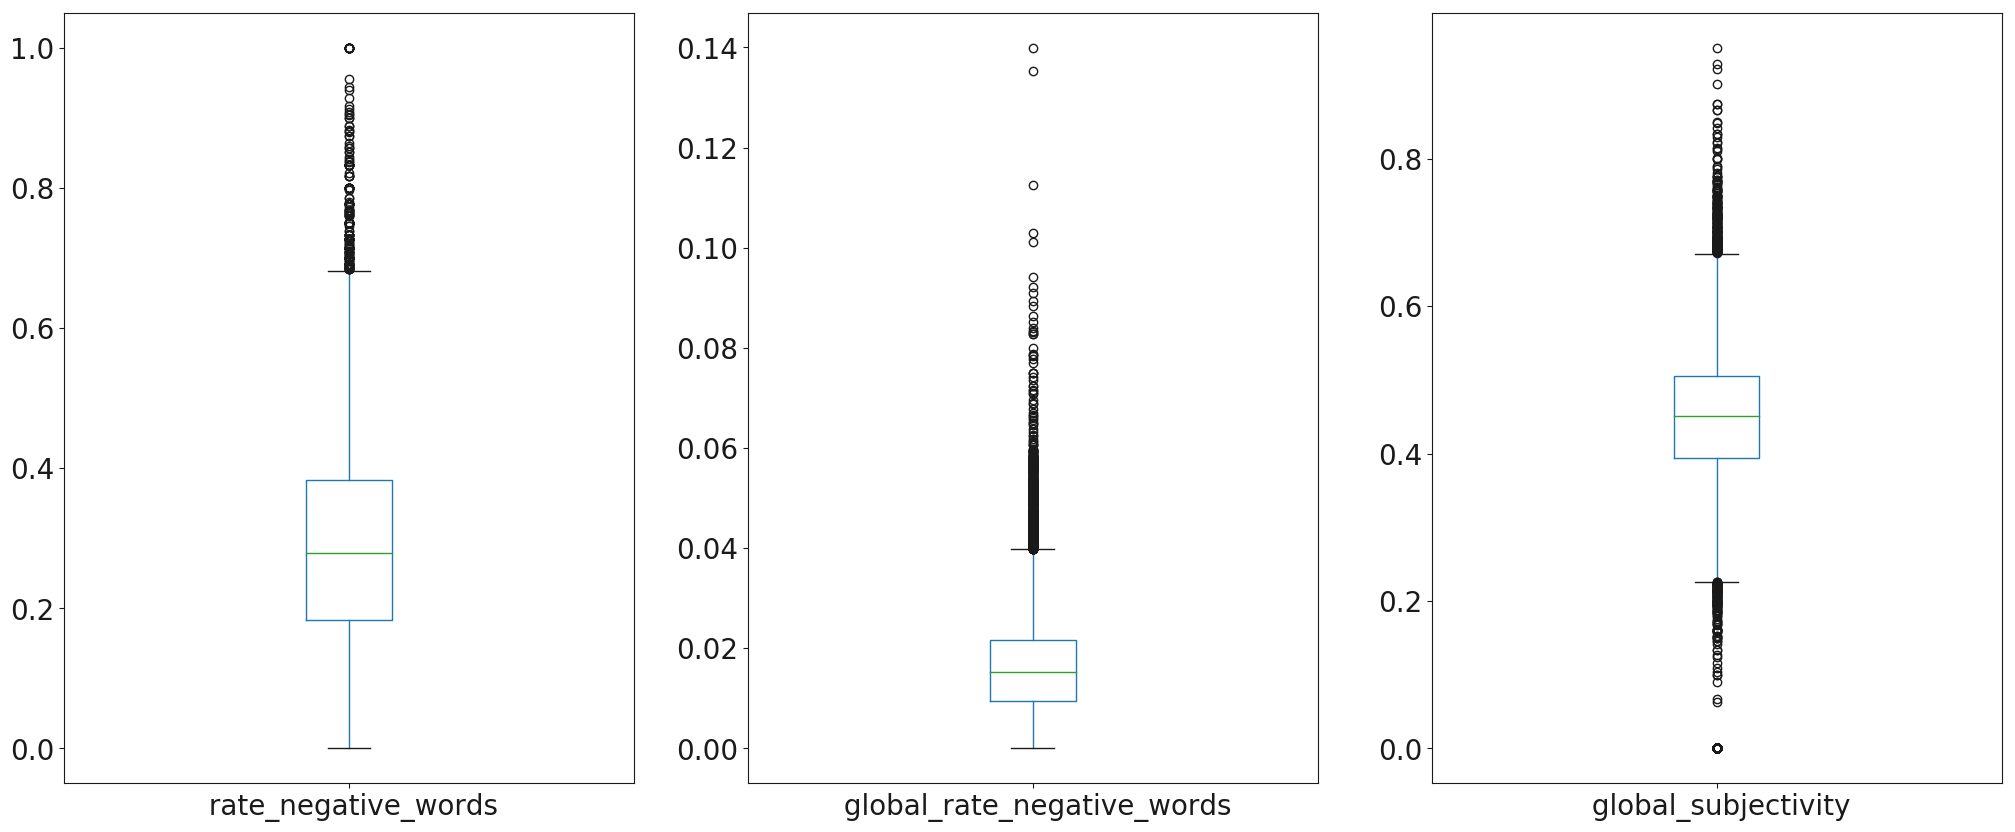

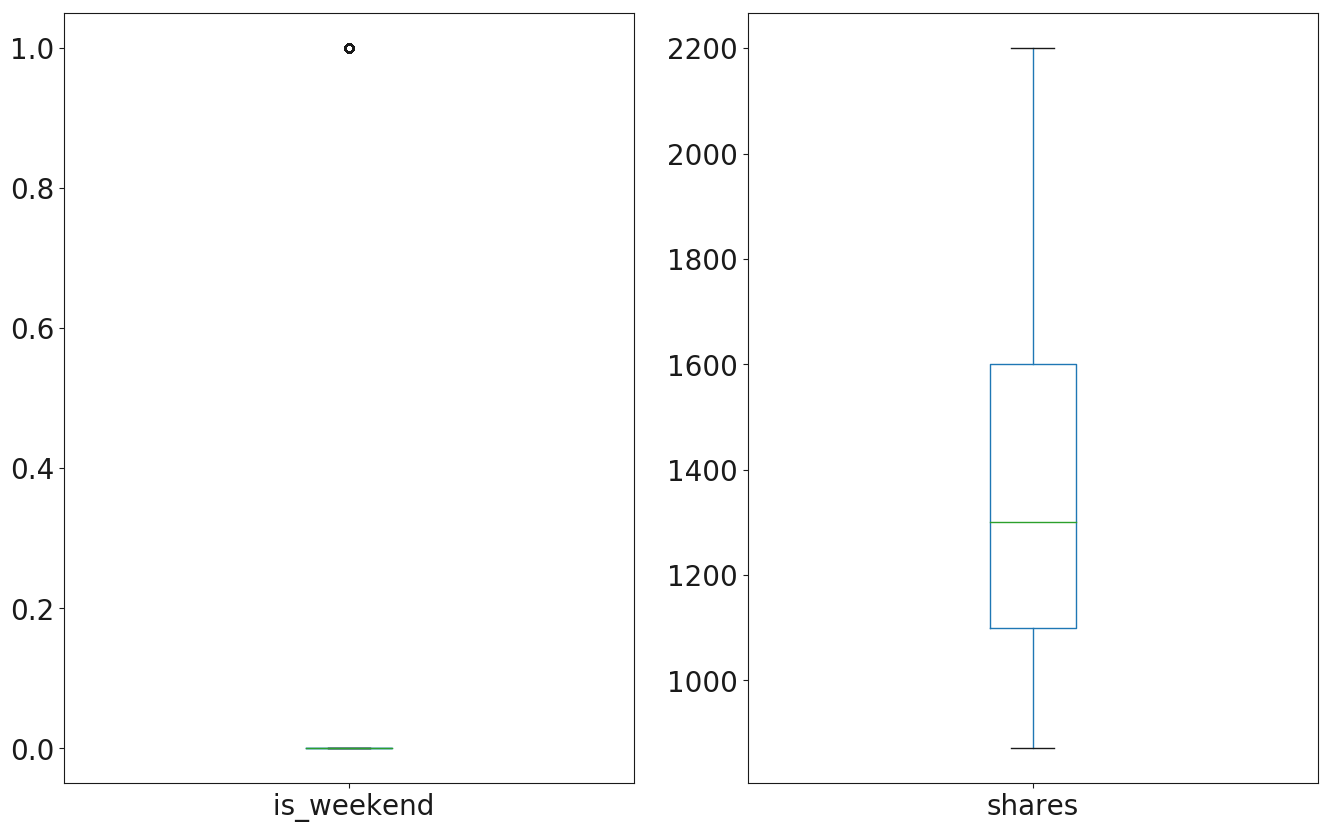

In [185]:
from matplotlib.pyplot import*
subplot(131)
d[" num_hrefs"].plot(kind="box",fontsize=20)
subplot(132)
d[" num_imgs"].plot(kind="box",fontsize=20)
subplot(133)
d[" num_videos"].plot(kind="box",figsize=(25,10),fontsize=20)
show()
subplot(131)
d[" average_token_length"].plot(kind="box",fontsize=20)
subplot(132)
#d[" data_channel_is_lifestyle"].plot(kind="box",fontsize=20)
#subplot(133)
d[" abs_title_subjectivity"].plot(kind="box",figsize=(25,10),fontsize=20)
show()
subplot(131)
d[" n_unique_tokens"].plot(kind="box",fontsize=20)
subplot(132)
d[" n_non_stop_unique_tokens"].plot(kind="box",fontsize=20)
subplot(133)
d[" n_tokens_title"].plot(kind="box",figsize=(25,10),fontsize=20)
show()
subplot(131)
#d[" n_tokens_content"].plot(kind="box",fontsize=20)
#subplot(132)
d[" title_sentiment_polarity"].plot(kind="box",fontsize=20)
subplot(132)
d[" num_self_hrefs"].plot(kind="box",figsize=(25,10),fontsize=20)
show()
subplot(131)
d[" rate_negative_words"].plot(kind="box",fontsize=20)
subplot(132)
d[" global_rate_negative_words"].plot(kind="box",fontsize=20)
subplot(133)
d[" global_subjectivity"].plot(kind="box",figsize=(25,10),fontsize=20)
show()
subplot(131)
#d[" global_sentiment_polarity"].plot(kind="box",fontsize=20)
#subplot(132)
d[" is_weekend"].plot(kind="box",fontsize=20)
subplot(132)
d["shares"].plot(kind="box",figsize=(25,10),fontsize=20)
show()

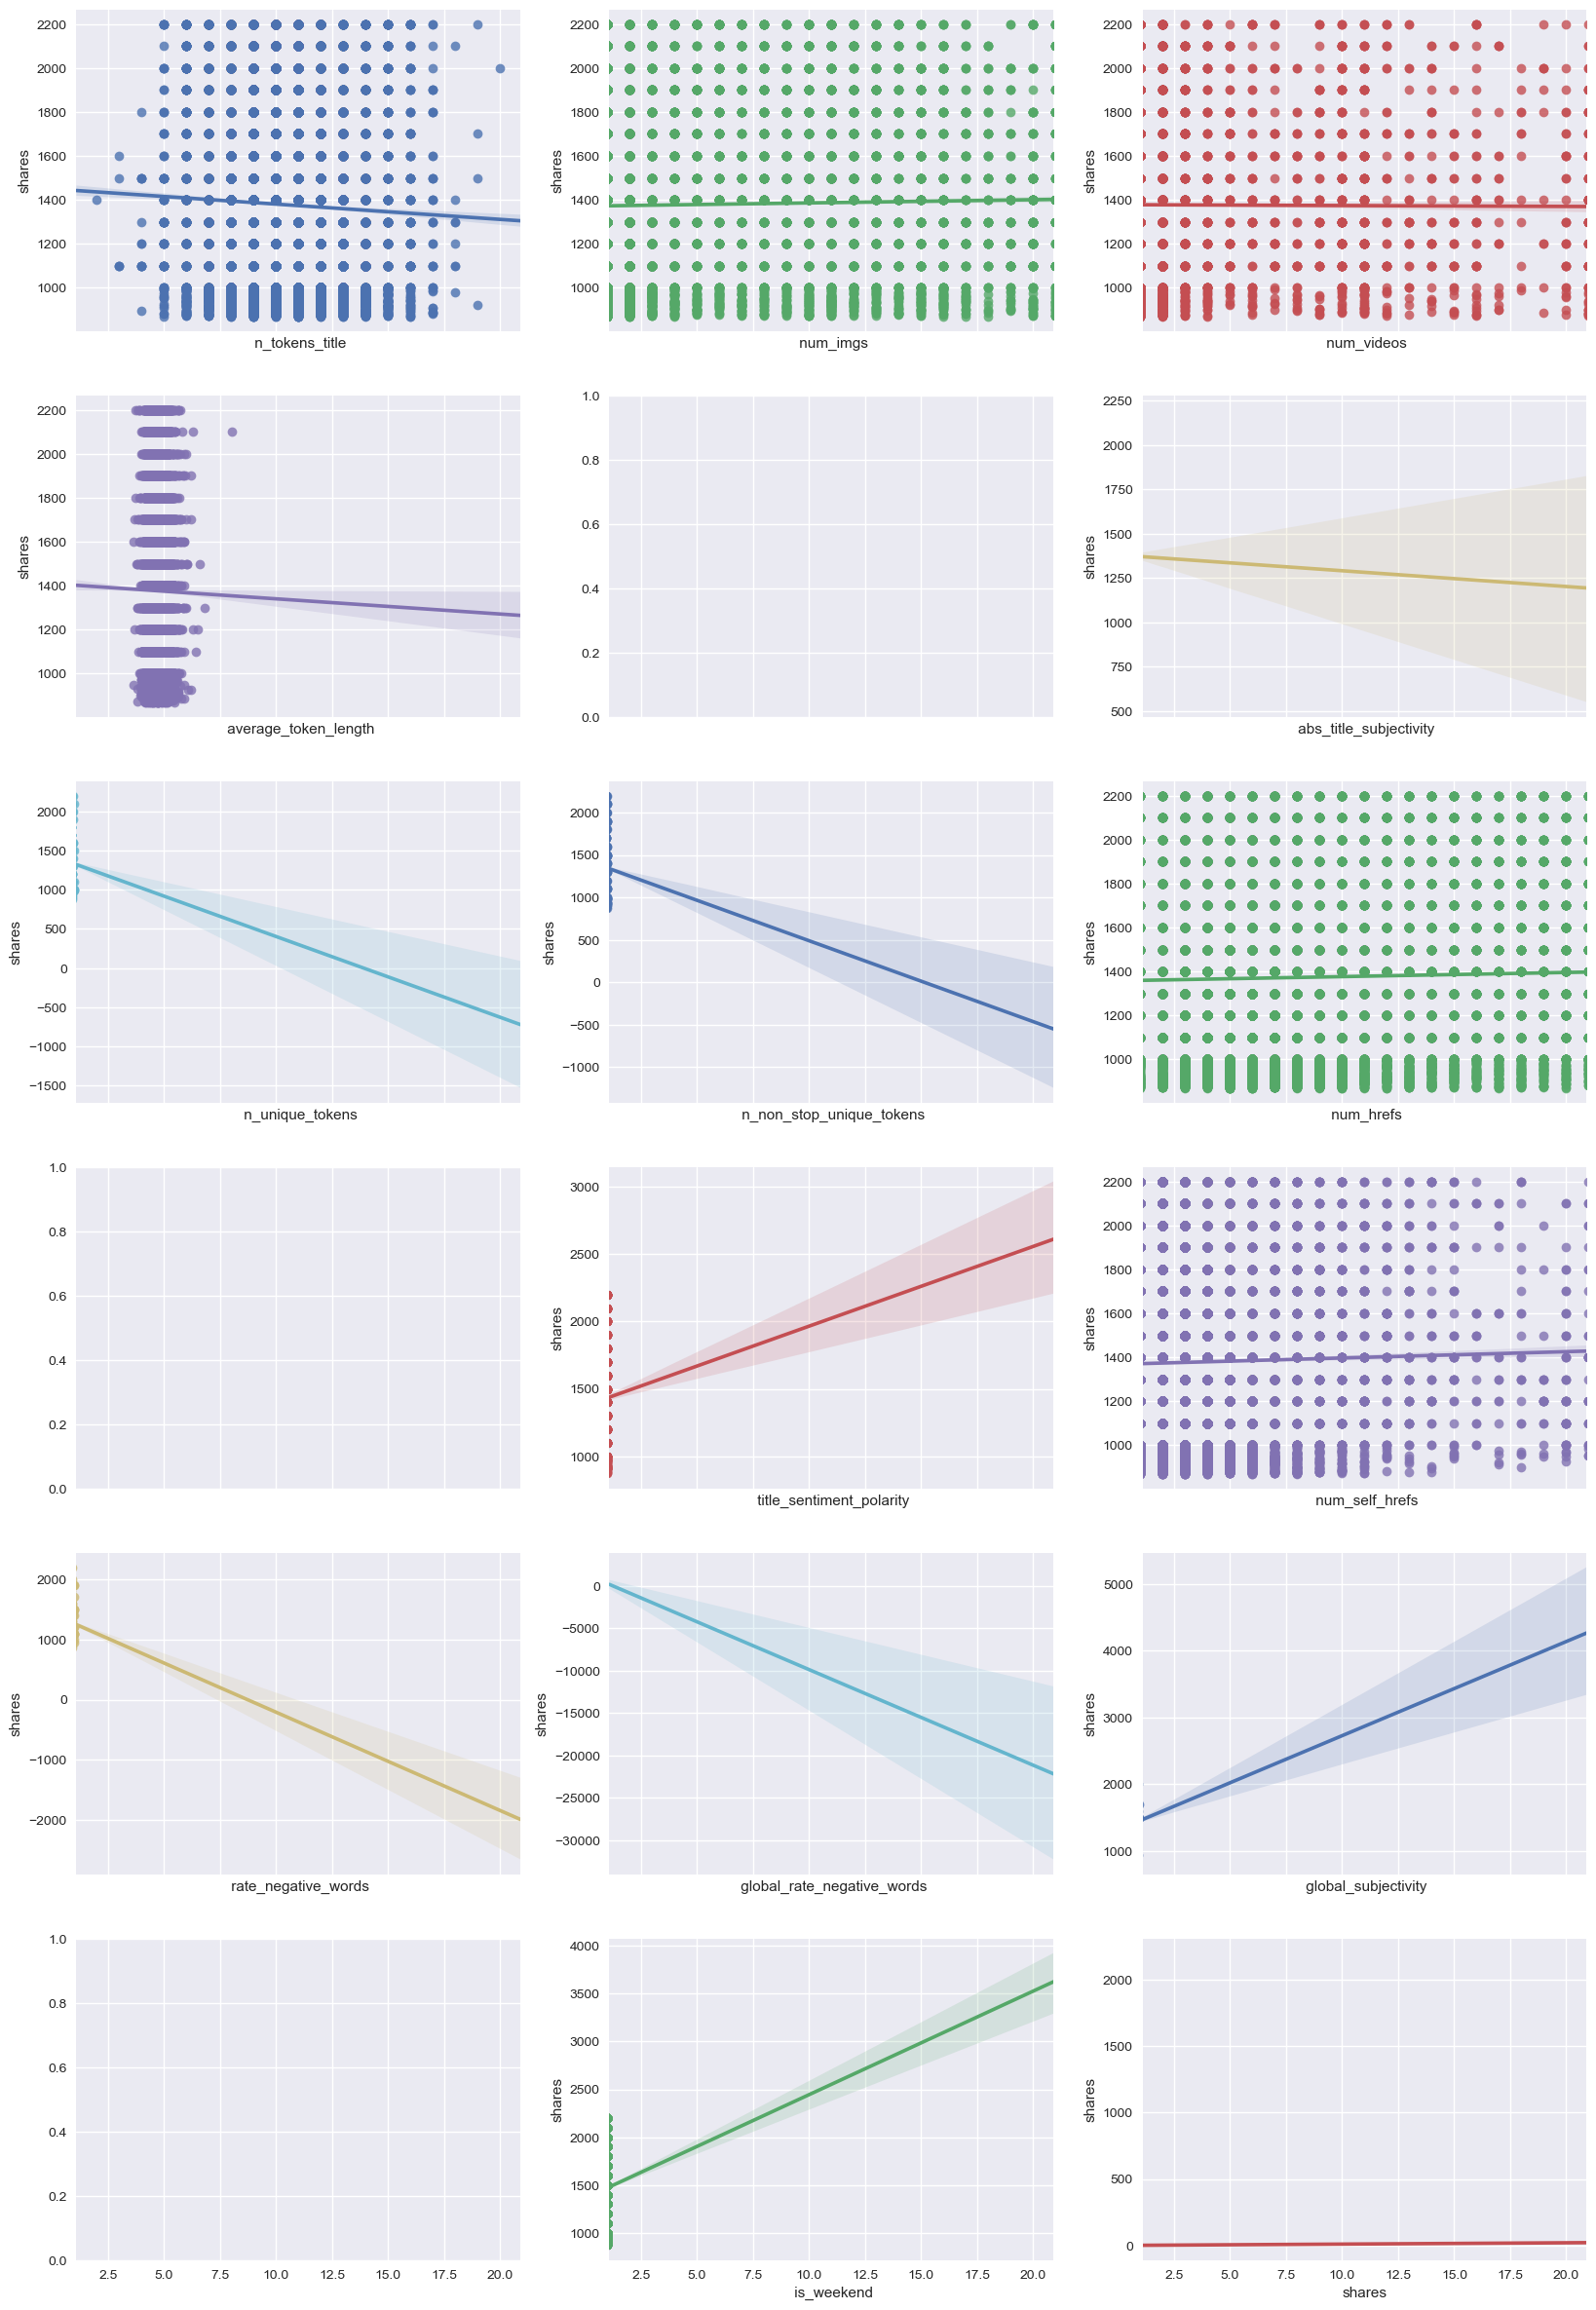

In [186]:
from matplotlib.pyplot import*
import seaborn as sns; sns.set(color_codes=True)
fig, axes = subplots(6,3,figsize=(20,30),sharex=True)
sns.regplot(x=" n_tokens_title", y="shares", data=d,ax=axes[0,0])
sns.regplot(x=" num_imgs", y="shares", data=d,ax=axes[0,1])
sns.regplot(x=" num_videos", y="shares", data=d,ax=axes[0,2])
sns.regplot(x=" average_token_length", y="shares", data=d,ax=axes[1,0])
#sns.regplot(x=" data_channel_is_lifestyle", y="shares", data=d,ax=axes[1,1])
sns.regplot(x=" abs_title_subjectivity", y="shares", data=d,ax=axes[1,2])
sns.regplot(x=" n_unique_tokens", y="shares", data=d,ax=axes[2,0])
sns.regplot(x=" n_non_stop_unique_tokens", y="shares", data=d,ax=axes[2,1])
sns.regplot(x=" num_hrefs", y="shares", data=d,ax=axes[2,2])
#sns.regplot(x=" n_tokens_content", y="shares", data=d,ax=axes[3,0])
sns.regplot(x=" title_sentiment_polarity", y="shares", data=d,ax=axes[3,1])
sns.regplot(x=" num_self_hrefs", y="shares", data=d,ax=axes[3,2])
sns.regplot(x=" rate_negative_words", y="shares", data=d,ax=axes[4,0])
sns.regplot(x=" global_rate_negative_words", y="shares", data=d,ax=axes[4,1])
sns.regplot(x=" global_subjectivity", y="shares", data=d,ax=axes[4,2])
#sns.regplot(x=" global_sentiment_polarity", y="shares", data=d,ax=axes[5,0])
sns.regplot(x=" is_weekend", y="shares", data=d,ax=axes[5,1])
sns.regplot(x="shares", y="shares", data=d,ax=axes[5,2])

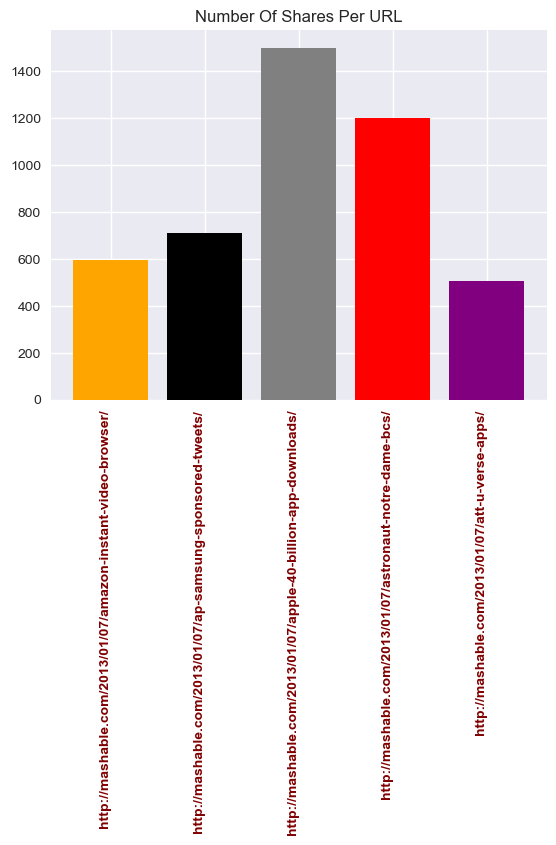

In [187]:
from matplotlib.pyplot import*
import matplotlib.pyplot as plt
import numpy as np
plt.bar(data["url"][0:5],data["shares"][0:5],color=["orange","black","grey","red","purple"])
plt.title("Number Of Shares Per URL")
plt.xticks(data["url"][0:5], color='maroon', rotation=90, fontweight='bold', fontsize='10', horizontalalignment='right')
plt.show()


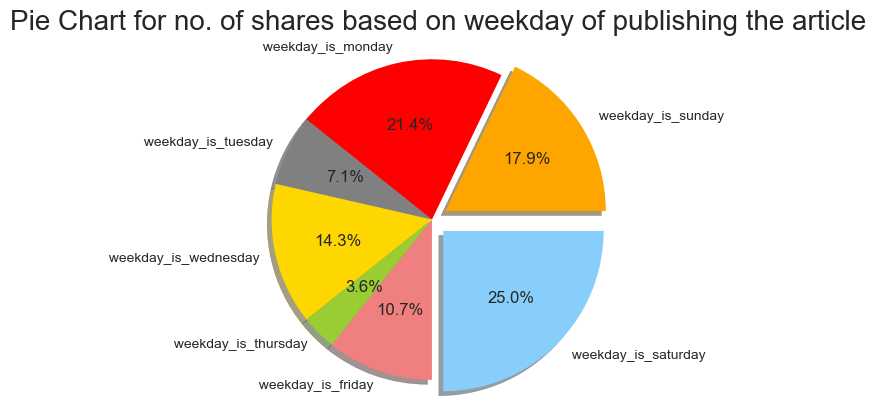

In [188]:
import matplotlib.pyplot as plt
from scipy import stats
 
 #Data to plot
labels = [' weekday_is_sunday', ' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday',' weekday_is_thursday',' weekday_is_friday',' weekday_is_saturday']
l=[data.corr()['shares'][' weekday_is_sunday'],data.corr()['shares'][' weekday_is_monday'],data.corr()['shares'][' weekday_is_tuesday'],data.corr()['shares'][' weekday_is_wednesday'],data.corr()['shares'][' weekday_is_thursday'],data.corr()['shares'][' weekday_is_friday'],data.corr()['shares'][' weekday_is_saturday']]
sizes = [stats.percentileofscore(l,data.corr()['shares'][' weekday_is_sunday']),stats.percentileofscore(l,data.corr()['shares'][' weekday_is_monday']),stats.percentileofscore(l,data.corr()['shares'][' weekday_is_tuesday']),stats.percentileofscore(l,data.corr()['shares'][' weekday_is_wednesday']),stats.percentileofscore(l,data.corr()['shares'][' weekday_is_thursday']),stats.percentileofscore(l,data.corr()['shares'][' weekday_is_friday']),stats.percentileofscore(l,data.corr()['shares'][' weekday_is_saturday'])]
colors = ['orange','red','grey','gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0, 0, 0, 0.1)  # explode 1st slice


plt.title("Pie Chart for no. of shares based on weekday of publishing the article",fontsize=20)
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
      autopct='%1.1f%%', shadow=True, startangle=0)
 
plt.axis('equal')
plt.show()

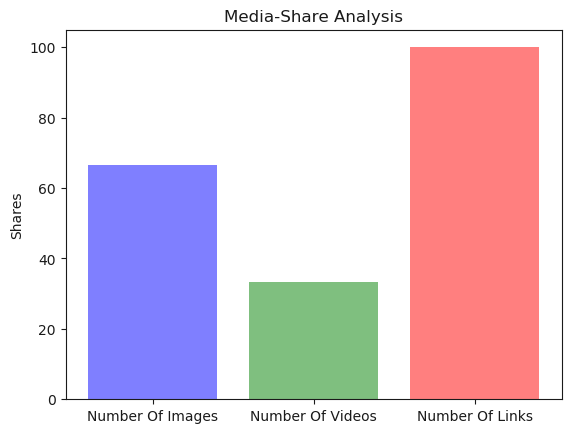

In [189]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
objects = ('Number Of Images','Number Of Videos','Number Of Links')
y_pos = np.arange(len(objects))
l=[data.corr()['shares'][' num_imgs'],data.corr()['shares'][' num_videos'],data.corr()['shares'][' num_hrefs'],]
performance = [stats.percentileofscore(l,data.corr()['shares'][' num_imgs']),stats.percentileofscore(l,data.corr()['shares'][' num_videos']),stats.percentileofscore(l,data.corr()['shares'][' num_hrefs']),]

 
plt.bar(y_pos, performance, align='center', alpha=0.5,color=['blue','green','red'])
plt.xticks(y_pos, objects)
plt.ylabel('Shares')
plt.title('Media-Share Analysis')
 
plt.show()

In [190]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [191]:
y=d['shares']

In [193]:

X=d[feature_names]
X.describe()


train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.33, random_state=1,stratify=d['popularity_of_shares'])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)


model = RandomForestRegressor(n_estimators=60, random_state=0)  
x=model.fit(train_X, train_y)  
y_pred_tr = model.predict(train_X)  
y_pred_ts = model.predict(test_X)  


In [194]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, y_pred_tr))  
print('Mean Squared Error:', metrics.mean_squared_error(train_y, y_pred_tr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, y_pred_tr)))  
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred_ts))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred_ts))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred_ts)))  

Mean Absolute Error: 114.61455109947913
Mean Squared Error: 19459.07904168698
Root Mean Squared Error: 139.4958029536623
Mean Absolute Error: 306.53970833333335
Mean Squared Error: 134823.39909626739
Root Mean Squared Error: 367.1830593808317


In [155]:
X=d[' n_tokens_title']
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.33, random_state=1,stratify=d['popularity_of_shares'])
train_X=np.array(train_X).reshape(-1, 1)
test_X=np.array(test_X).reshape(-1, 1)
regressor = RandomForestRegressor(n_estimators=60, random_state=0)  
regressor.fit(train_X, train_y)  
y_pred_tr = regressor.predict(train_X)  
y_pred_ts = regressor.predict(test_X)  
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, y_pred_tr))  
print('Mean Squared Error:', metrics.mean_squared_error(train_y, y_pred_tr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, y_pred_tr)))  
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred_ts))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred_ts))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred_ts)))  


Mean Absolute Error: 314.23685388918284
Mean Squared Error: 139136.70447372206
Root Mean Squared Error: 373.01032756979004
Mean Absolute Error: 314.79249049570404
Mean Squared Error: 139921.91020896257
Root Mean Squared Error: 374.0613722492107


In [116]:
X=d[' n_unique_tokens']
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.33, random_state=1,stratify=d['popularity_of_shares'])
train_X=np.array(train_X).reshape(-1, 1)
test_X=np.array(test_X).reshape(-1, 1)
regressor = RandomForestRegressor(n_estimators=60, random_state=0)  
regressor.fit(train_X, train_y)  
y_pred_tr = regressor.predict(train_X)  
y_pred_ts = regressor.predict(test_X)  
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, y_pred_tr))  
print('Mean Squared Error:', metrics.mean_squared_error(train_y, y_pred_tr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, y_pred_tr)))  
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred_ts))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred_ts))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred_ts)))  


Mean Absolute Error: 179.1236459443848
Mean Squared Error: 53801.52455528826
Root Mean Squared Error: 231.9515564838664
Mean Absolute Error: 362.2957030783557
Mean Squared Error: 199081.11427686535
Root Mean Squared Error: 446.18506729480015


In [117]:
X=d[' num_hrefs' ]
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.33, random_state=1,stratify=d['popularity_of_shares'])
train_X=np.array(train_X).reshape(-1, 1)
test_X=np.array(test_X).reshape(-1, 1)
regressor = RandomForestRegressor(n_estimators=60, random_state=0)  
regressor.fit(train_X, train_y)  
y_pred_tr = regressor.predict(train_X)  
y_pred_ts = regressor.predict(test_X)  
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, y_pred_tr))  
print('Mean Squared Error:', metrics.mean_squared_error(train_y, y_pred_tr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, y_pred_tr)))  
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred_ts))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred_ts))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred_ts)))  


Mean Absolute Error: 312.6865203843808
Mean Squared Error: 138152.10298813388
Root Mean Squared Error: 371.68817977995195
Mean Absolute Error: 314.9700079695341
Mean Squared Error: 140433.679308802
Root Mean Squared Error: 374.7448189218925


In [118]:
X=d[' num_imgs']
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.33, random_state=1,stratify=d['popularity_of_shares'])
train_X=np.array(train_X).reshape(-1, 1)
test_X=np.array(test_X).reshape(-1, 1)
regressor = RandomForestRegressor(n_estimators=60, random_state=0)  
regressor.fit(train_X, train_y)  
y_pred_tr = regressor.predict(train_X)  
y_pred_ts = regressor.predict(test_X)  
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, y_pred_tr))  
print('Mean Squared Error:', metrics.mean_squared_error(train_y, y_pred_tr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, y_pred_tr)))  
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred_ts))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred_ts))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred_ts)))  


Mean Absolute Error: 312.97442411704634
Mean Squared Error: 138207.6431888734
Root Mean Squared Error: 371.7628857065662
Mean Absolute Error: 314.4856461077618
Mean Squared Error: 139843.85050364534
Root Mean Squared Error: 373.95701691992


In [119]:
X=d[ ' num_videos']
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.33, random_state=1,stratify=d['popularity_of_shares'])
train_X=np.array(train_X).reshape(-1, 1)
test_X=np.array(test_X).reshape(-1, 1)
regressor = RandomForestRegressor(n_estimators=60, random_state=0)  
regressor.fit(train_X, train_y)  
y_pred_tr = regressor.predict(train_X)  
y_pred_ts = regressor.predict(test_X)  
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, y_pred_tr))  
print('Mean Squared Error:', metrics.mean_squared_error(train_y, y_pred_tr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, y_pred_tr)))  
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred_ts))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred_ts))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred_ts)))  


Mean Absolute Error: 314.0244266139222
Mean Squared Error: 139145.7216739632
Root Mean Squared Error: 373.02241443908326
Mean Absolute Error: 315.31954457248213
Mean Squared Error: 140464.27454514822
Root Mean Squared Error: 374.7856381255133


In [120]:
X=d[ ' num_self_hrefs' ]
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.33, random_state=1,stratify=d['popularity_of_shares'])
train_X=np.array(train_X).reshape(-1, 1)
test_X=np.array(test_X).reshape(-1, 1)
regressor = RandomForestRegressor(n_estimators=60, random_state=0)  
regressor.fit(train_X, train_y)  
y_pred_tr = regressor.predict(train_X)  
y_pred_ts = regressor.predict(test_X)  
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, y_pred_tr))  
print('Mean Squared Error:', metrics.mean_squared_error(train_y, y_pred_tr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, y_pred_tr)))  
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred_ts))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred_ts))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred_ts)))  


Mean Absolute Error: 314.0272389387668
Mean Squared Error: 139012.78696650473
Root Mean Squared Error: 372.84418590948246
Mean Absolute Error: 315.0527188987639
Mean Squared Error: 140446.56823459847
Root Mean Squared Error: 374.76201546394543


In [121]:
X=d[ ' average_token_length']
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.33, random_state=1,stratify=d['popularity_of_shares'])
train_X=np.array(train_X).reshape(-1, 1)
test_X=np.array(test_X).reshape(-1, 1)
regressor = RandomForestRegressor(n_estimators=60, random_state=0)  
regressor.fit(train_X, train_y)  
y_pred_tr = regressor.predict(train_X)  
y_pred_ts = regressor.predict(test_X)  
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, y_pred_tr))  
print('Mean Squared Error:', metrics.mean_squared_error(train_y, y_pred_tr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, y_pred_tr)))  
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred_ts))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred_ts))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred_ts)))  


Mean Absolute Error: 156.03403677563705
Mean Squared Error: 41327.44074969197
Root Mean Squared Error: 203.29151666926973
Mean Absolute Error: 364.4309288732805
Mean Squared Error: 202921.78823105752
Root Mean Squared Error: 450.4684098036815


In [122]:
X=d[ ' kw_avg_avg']
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.33, random_state=1,stratify=d['popularity_of_shares'])
train_X=np.array(train_X).reshape(-1, 1)
test_X=np.array(test_X).reshape(-1, 1)
regressor = RandomForestRegressor(n_estimators=60, random_state=0)  
regressor.fit(train_X, train_y)  
y_pred_tr = regressor.predict(train_X)  
y_pred_ts = regressor.predict(test_X)  
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, y_pred_tr))  
print('Mean Squared Error:', metrics.mean_squared_error(train_y, y_pred_tr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, y_pred_tr)))  
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred_ts))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred_ts))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred_ts)))  


Mean Absolute Error: 136.25615346529065
Mean Squared Error: 29192.7563045625
Root Mean Squared Error: 170.85887833110255
Mean Absolute Error: 358.25545861259184
Mean Squared Error: 199626.50753996917
Root Mean Squared Error: 446.79582310040587


In [156]:
feats=[' n_tokens_title', 
       ' n_unique_tokens',  ' n_non_stop_unique_tokens']
X=d[feats]
X.describe()


train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.33, random_state=1,stratify=d['popularity_of_shares'])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)


regressor = RandomForestRegressor(n_estimators=60, random_state=0)  
regressor.fit(train_X, train_y)  
y_pred_tr = regressor.predict(train_X)  
y_pred_ts = regressor.predict(test_X)  


In [157]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, y_pred_tr))  
print('Mean Squared Error:', metrics.mean_squared_error(train_y, y_pred_tr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, y_pred_tr)))  
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred_ts))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred_ts))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred_ts)))  

Mean Absolute Error: 127.74802902815188
Mean Squared Error: 25553.98218442653
Root Mean Squared Error: 159.85612964295905
Mean Absolute Error: 329.08479001773924
Mean Squared Error: 158574.4049771717
Root Mean Squared Error: 398.2140190615741


In [125]:
feats=[ ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos']
X=d[feats]
X.describe()


train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.33, random_state=1,stratify=d['popularity_of_shares'])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)


regressor = RandomForestRegressor(n_estimators=60, random_state=0)  
regressor.fit(train_X, train_y)  
y_pred_tr = regressor.predict(train_X)  
y_pred_ts = regressor.predict(test_X)  


In [126]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, y_pred_tr))  
print('Mean Squared Error:', metrics.mean_squared_error(train_y, y_pred_tr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, y_pred_tr)))  
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred_ts))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred_ts))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred_ts)))  

Mean Absolute Error: 245.36778026014008
Mean Squared Error: 95265.3468687895
Root Mean Squared Error: 308.6508494541842
Mean Absolute Error: 327.923758024612
Mean Squared Error: 157971.56821934847
Root Mean Squared Error: 397.45637272454


In [132]:
from sklearn.model_selection import train_test_split
y=d['popularity_level']
X=d[feature_names]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,stratify=d['popularity_level'])
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.ensemble import RandomForestClassifier


clf=RandomForestClassifier(n_estimators=150)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy of Random Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Random Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


Accuracy of Random Tree classifier on training set: 1.00
Accuracy of Random Tree classifier on test set: 0.56


array([[   0,   38,  120],
       [   0, 1051, 1154],
       [   0,  810, 1675]], dtype=int64)